# 1. Loading Data and Early Explorations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [3]:
# Seed all parameters to ensure repeatability
seed_everything()

In [4]:
# Read in our data file
df = pd.read_csv('Difference Training.csv')

In [5]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,Difference
0,O,O,1.0,1.0,0.0,0.0,8.0,8.00,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.18552
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.50,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,-0.23137
2,O,Cl,1.0,1.0,0.0,0.0,8.0,17.00,3.44,3.16,...,26.59,6.43,10.89,0.66,176.69,2.67,156.25,42.25,176.76,-0.15136
3,OH,O,2.0,1.0,1.0,0.0,4.5,8.00,2.82,3.44,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,-0.23137
4,OH,OH,2.0,2.0,1.0,1.0,4.5,4.50,2.82,2.82,...,26.04,1.23,7.95,0.23,185.18,1.85,20.25,49.00,169.52,-0.28251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,-0.01868
60,Br,CH,1.0,2.0,0.0,1.0,35.0,3.50,2.96,2.38,...,22.45,4.78,7.12,0.71,146.93,2.72,370.56,36.00,126.00,-0.01465
61,Br,CH2,1.0,3.0,0.0,2.0,35.0,2.67,2.96,2.32,...,22.21,4.59,6.96,0.64,151.69,2.59,354.69,42.25,123.32,-0.05260
62,Br,SH,1.0,2.0,0.0,1.0,35.0,8.50,2.96,2.39,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,-0.01192


In [6]:
df.shape

(64, 55)

In [7]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [8]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,O,O
1,O,OH
2,O,Cl
3,OH,O
4,OH,OH
...,...,...
59,Cl,Br
60,Br,CH
61,Br,CH2
62,Br,SH


In [9]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [11]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,Difference
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735938,2.735938,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,-0.113104
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.106286
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.397030
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,-0.165415
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,-0.106910
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,-0.042455
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.117560


# 2. Normalizing and Creating Dummy Variables

In [12]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [13]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [14]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [15]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [16]:
final_df = df

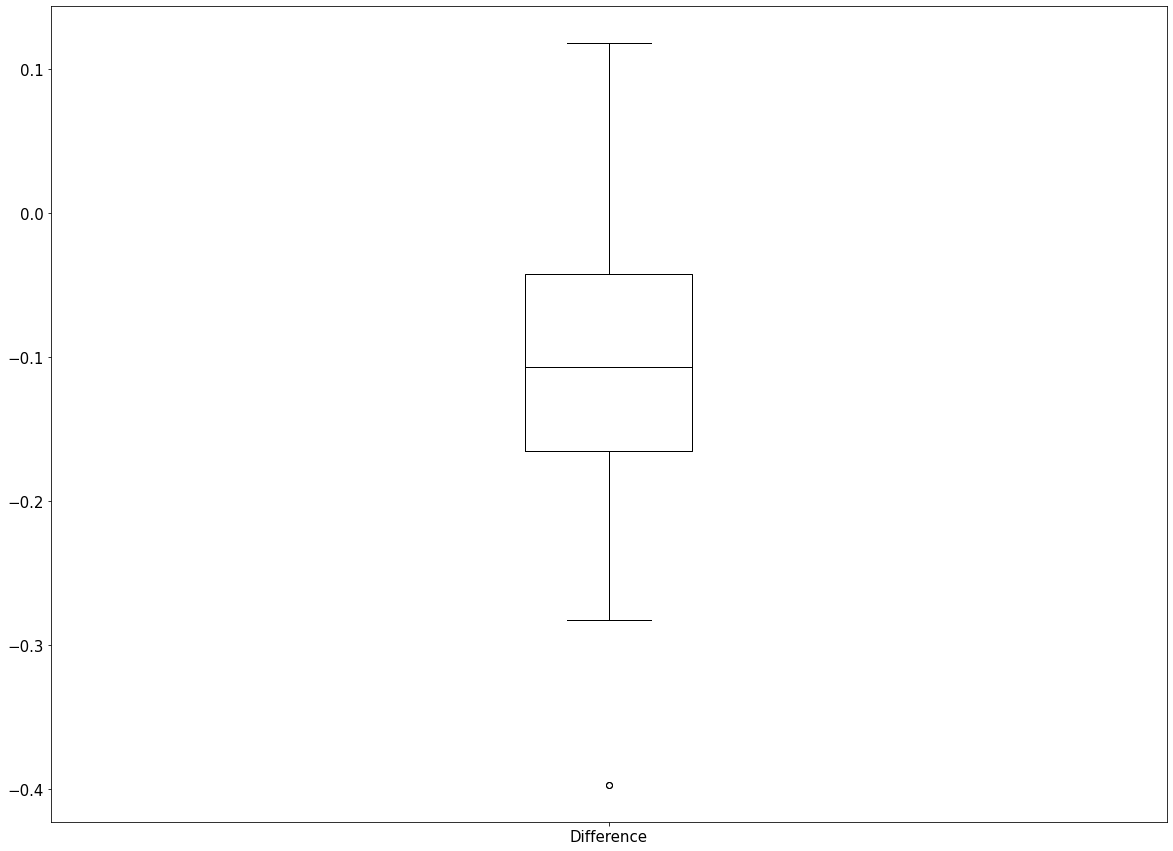

In [176]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Difference', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Round 1

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [18]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['Gradient Boosting Regressor', 'K-Nearest Regressor', 'Random Forest Regressor', 'Support Vector Regressor', 
                                     'Ridge Regressor', 'X-Gradient Boosting Regressor', 'LightGBM Regressor'])

In [19]:
start = time.time()
val_score(final_df, 1, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 51 seconds


In [20]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"


### Feature Importance

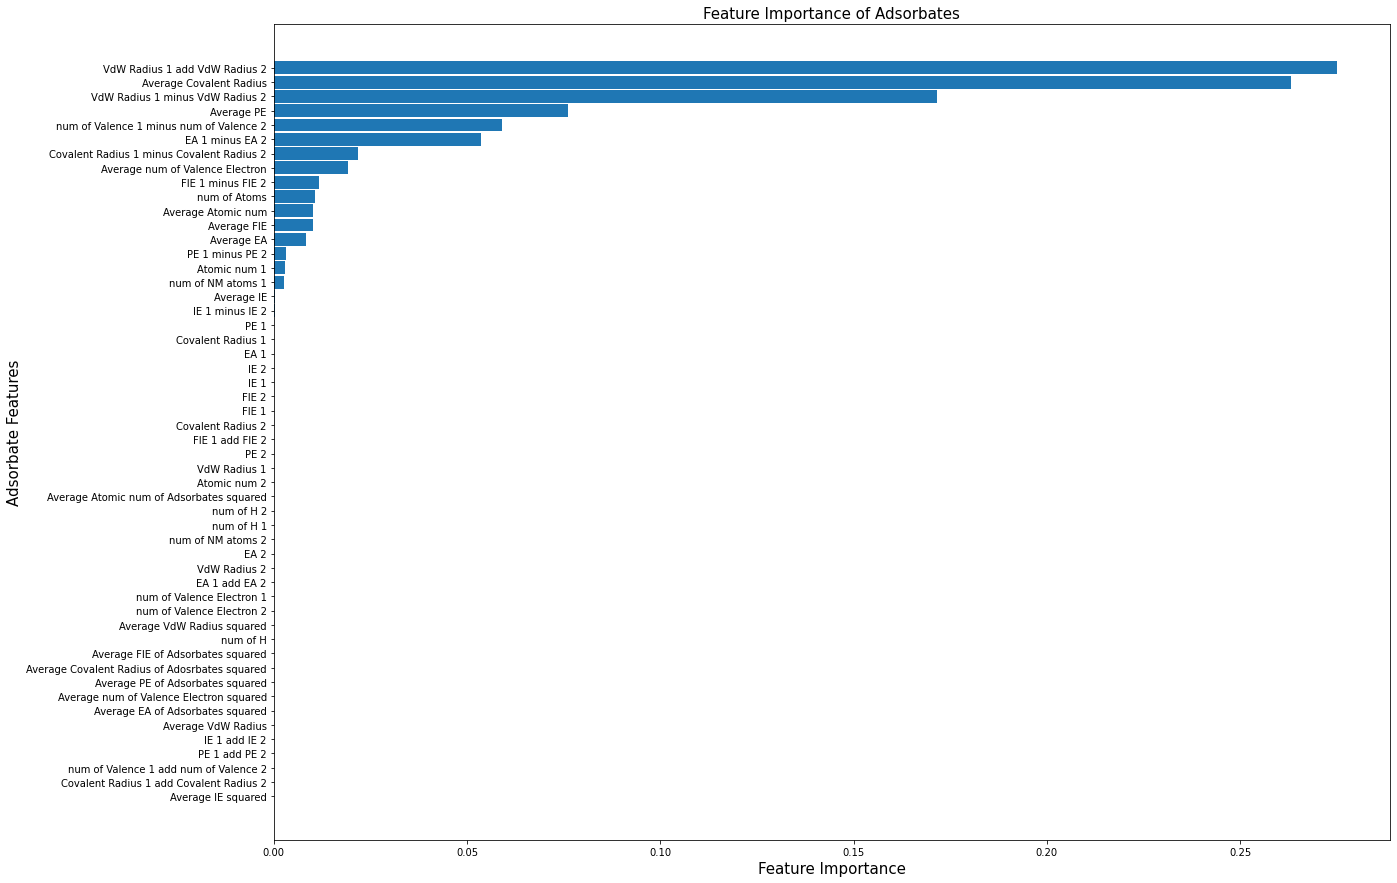

In [21]:
feature_importance(XGBRegressor(), final_df)

### Pearson's Correlation

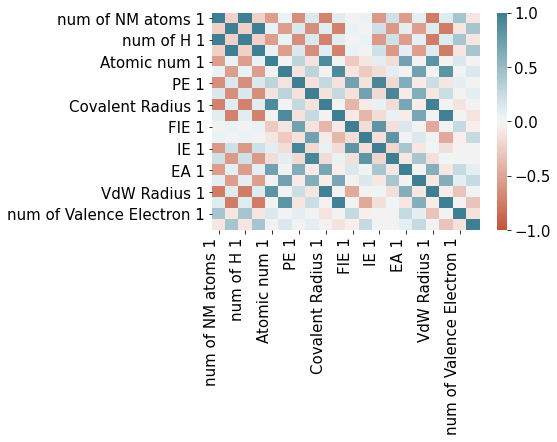

In [22]:
pearson_correlation(final_df)

## Round 2

In [23]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [24]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [25]:
start = time.time()
val_score(df_v2, 2, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 45 seconds


In [26]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"


### Feature Importance and Correlation (Round 2)

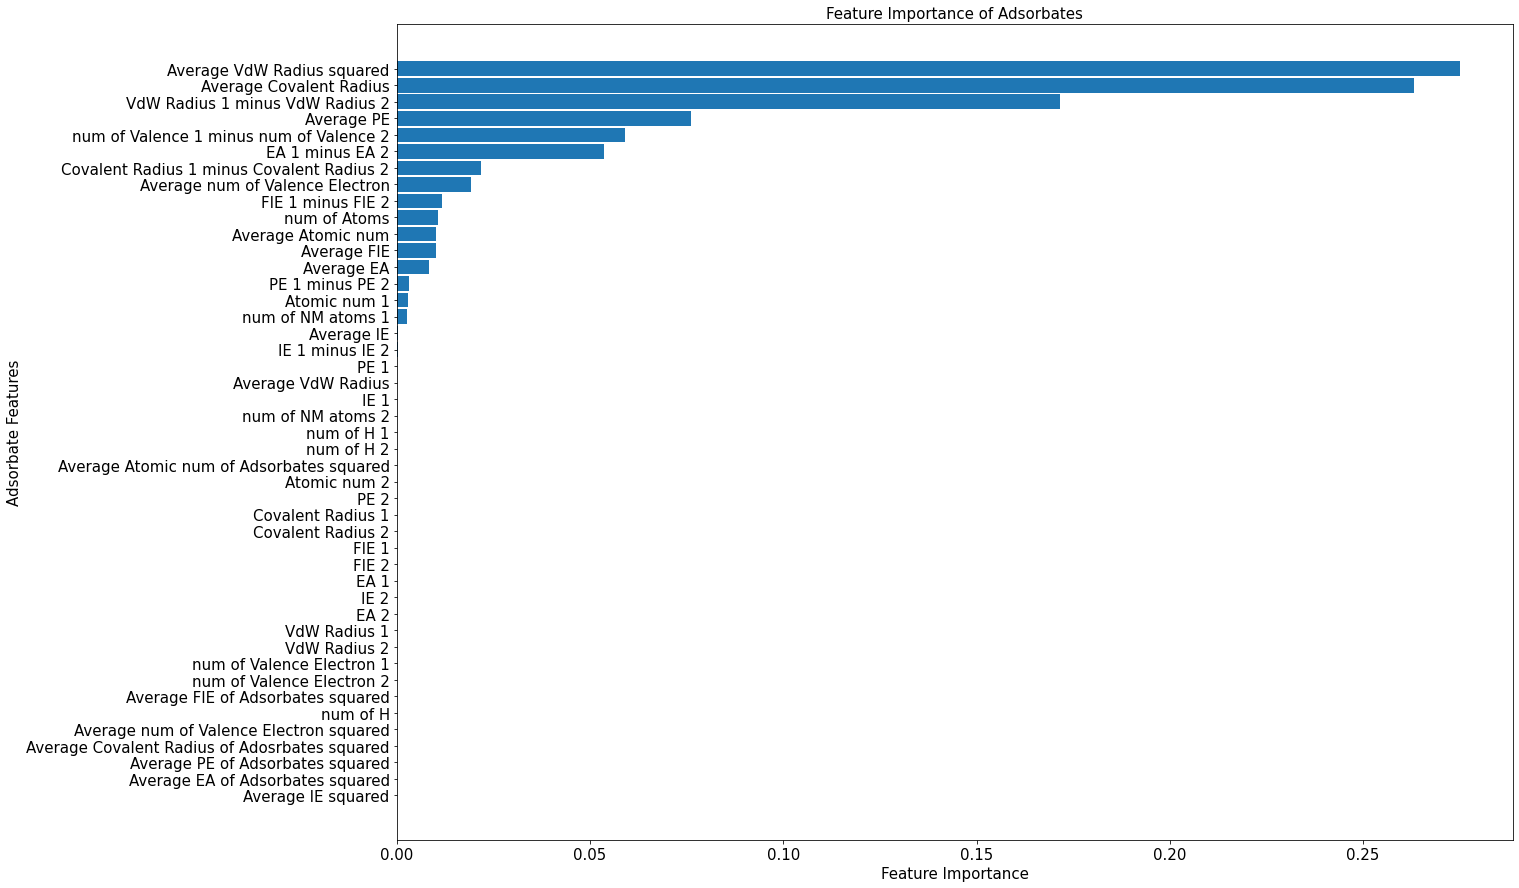

In [27]:
feature_importance(XGBRegressor(), df_v2)

## Round 3

In [28]:
df_v3 = df_v2.copy()

### Justification for dropping features

low importance single features were removed in this iteration of adjustments.

- 12 features (6 pairs) of adsorbate features were removed

In [29]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [30]:
start = time.time()
val_score(df_v3, 3, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 43 seconds


In [31]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"
3,"[0.0172, 0.0258]","[0.0636, 0.0819]","[0.0405, 0.0534]","[0.0814, 0.0999]","[0.0759, 0.0965]","[0.025, 0.0384]","[0.0543, 0.0716]"


### Feature Importance and Correlation (Round 3)

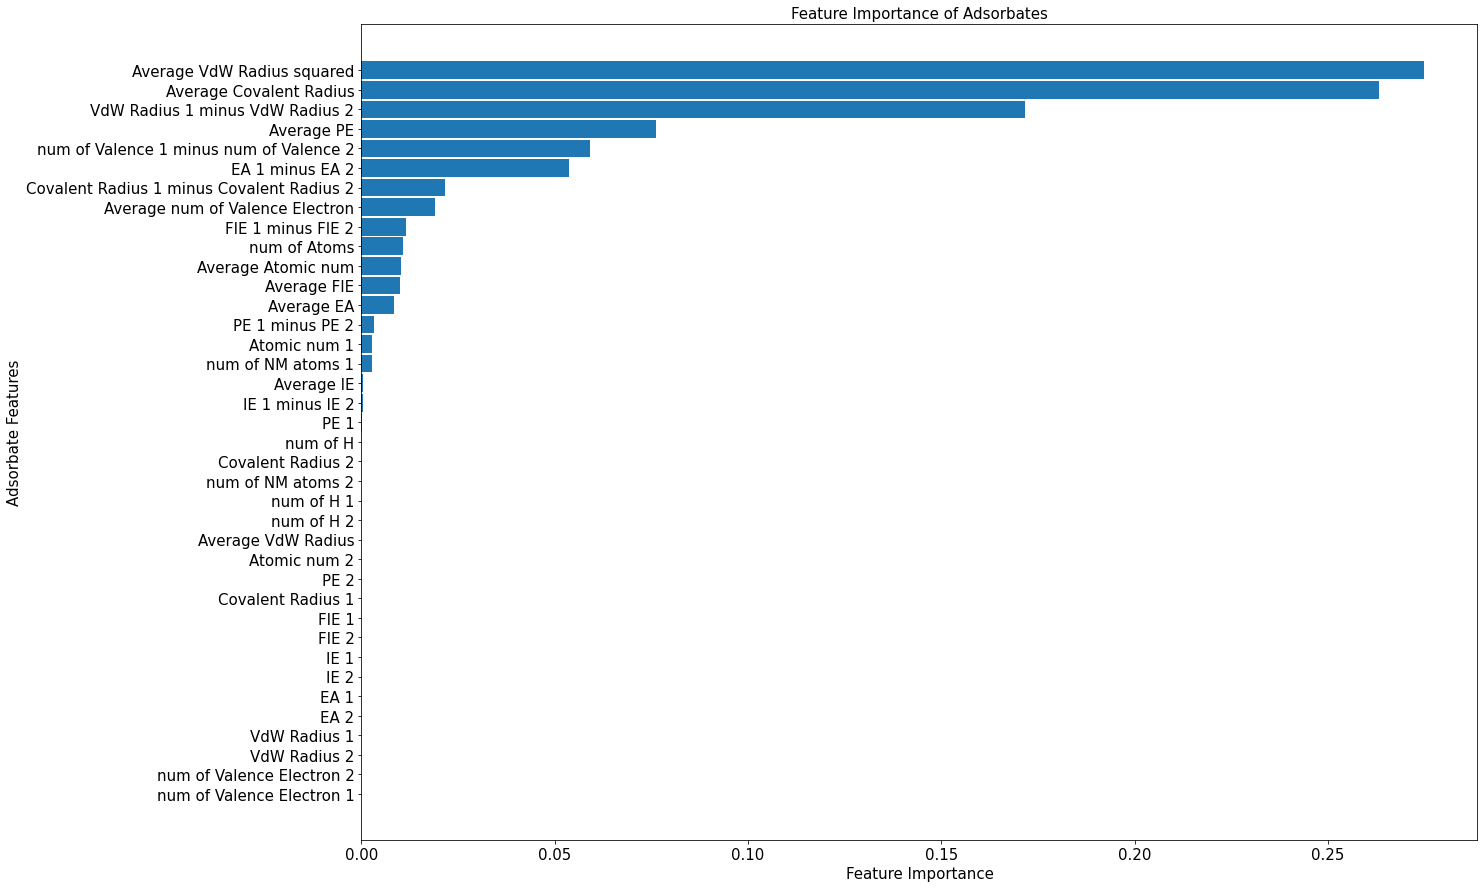

In [32]:
feature_importance(XGBRegressor(), df_v3)

## Round 4

In [33]:
df_v4 = df_v3.copy()

In [34]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2'])

In [35]:
start = time.time()
val_score(df_v4, 4, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 41 seconds


In [36]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"
3,"[0.0172, 0.0258]","[0.0636, 0.0819]","[0.0405, 0.0534]","[0.0814, 0.0999]","[0.0759, 0.0965]","[0.025, 0.0384]","[0.0543, 0.0716]"
4,"[0.0159, 0.0241]","[0.0644, 0.0841]","[0.0382, 0.0505]","[0.0772, 0.0953]","[0.0731, 0.0934]","[0.0247, 0.038]","[0.054, 0.0712]"


### Feature Importance and Correlation (Round 4)

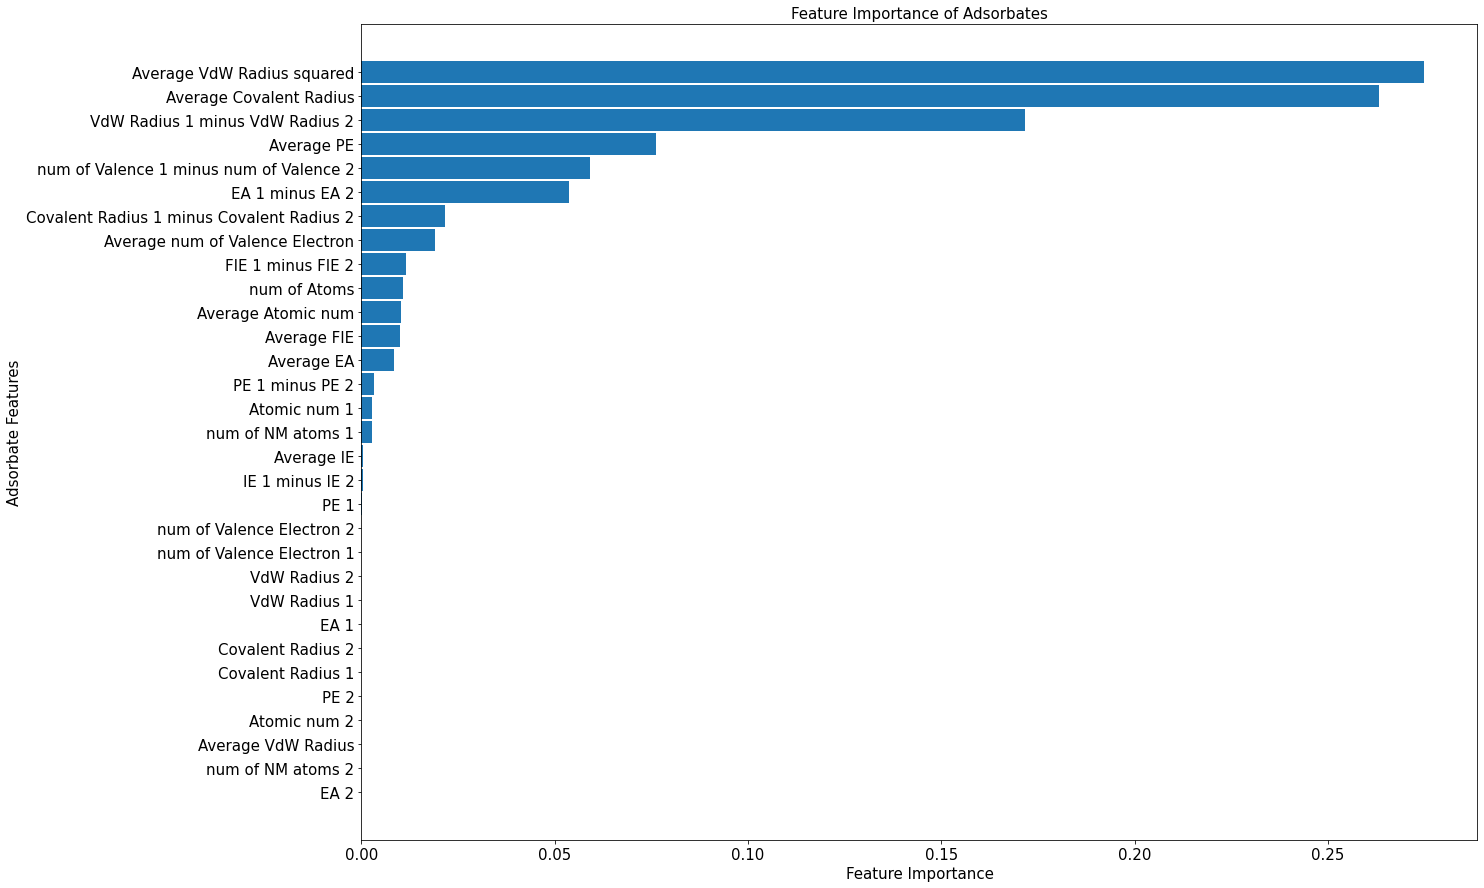

In [37]:
feature_importance(XGBRegressor(), df_v4)

## Round 5

In [39]:
df_v5 = df_v4.copy()

In [41]:
df_v5 = df_v5.drop(columns = ['num of NM atoms 1', 'num of NM atoms 2', 'EA 1', 'EA 2', 'Atomic num 1',
       'Atomic num 2', 'PE 1', 'PE 2', 'VdW Radius 1',
       'VdW Radius 2', 'Covalent Radius 1', 'Covalent Radius 2', 
       'num of Valence Electron 1', 'num of Valence Electron 2', 'Average VdW Radius', 'IE 1 minus IE 2',
       'Average IE'])

In [42]:
start = time.time()
val_score(df_v5, 5, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 35 seconds


In [43]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.016, 0.0243]","[0.0554, 0.0703]","[0.0395, 0.0519]","[0.0716, 0.0902]","[0.0732, 0.0936]","[0.025, 0.0383]","[0.0531, 0.0701]"
2,"[0.0168, 0.0252]","[0.0554, 0.0703]","[0.0395, 0.052]","[0.0715, 0.0902]","[0.0751, 0.0951]","[0.0249, 0.0382]","[0.0532, 0.0703]"
3,"[0.0172, 0.0258]","[0.0636, 0.0819]","[0.0405, 0.0534]","[0.0814, 0.0999]","[0.0759, 0.0965]","[0.025, 0.0384]","[0.0543, 0.0716]"
4,"[0.0159, 0.0241]","[0.0644, 0.0841]","[0.0382, 0.0505]","[0.0772, 0.0953]","[0.0731, 0.0934]","[0.0247, 0.038]","[0.054, 0.0712]"
5,"[0.0107, 0.0178]","[0.0674, 0.0894]","[0.0316, 0.0414]","[0.0711, 0.0881]","[0.0645, 0.0838]","[0.0103, 0.0181]","[0.0526, 0.0692]"


### Feature Importance and Correlation (Round 5)

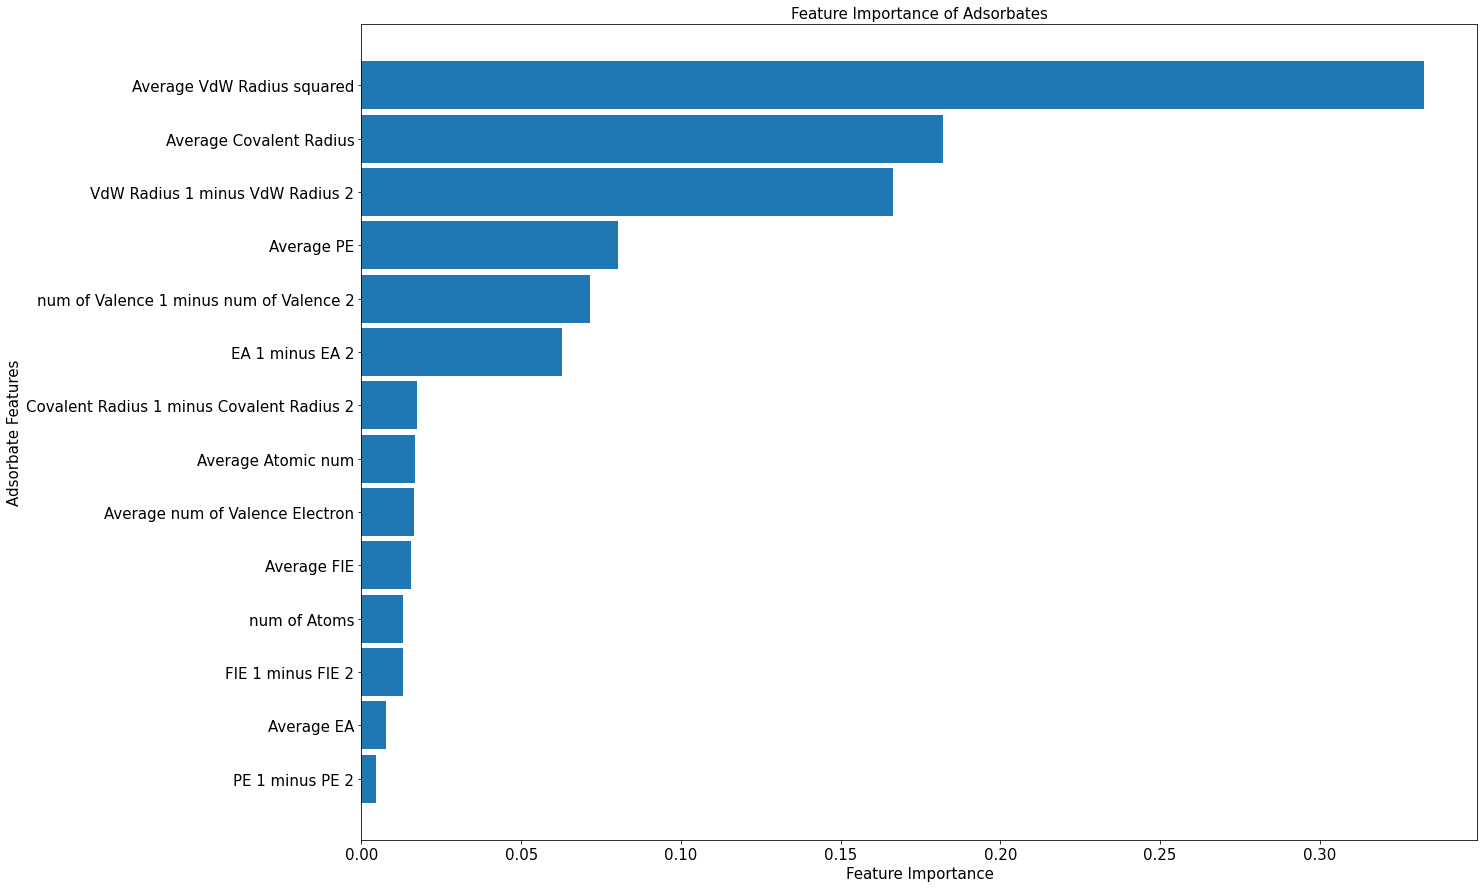

In [44]:
feature_importance(XGBRegressor(), df_v5)

### Pearson's Correlation (Round 5)

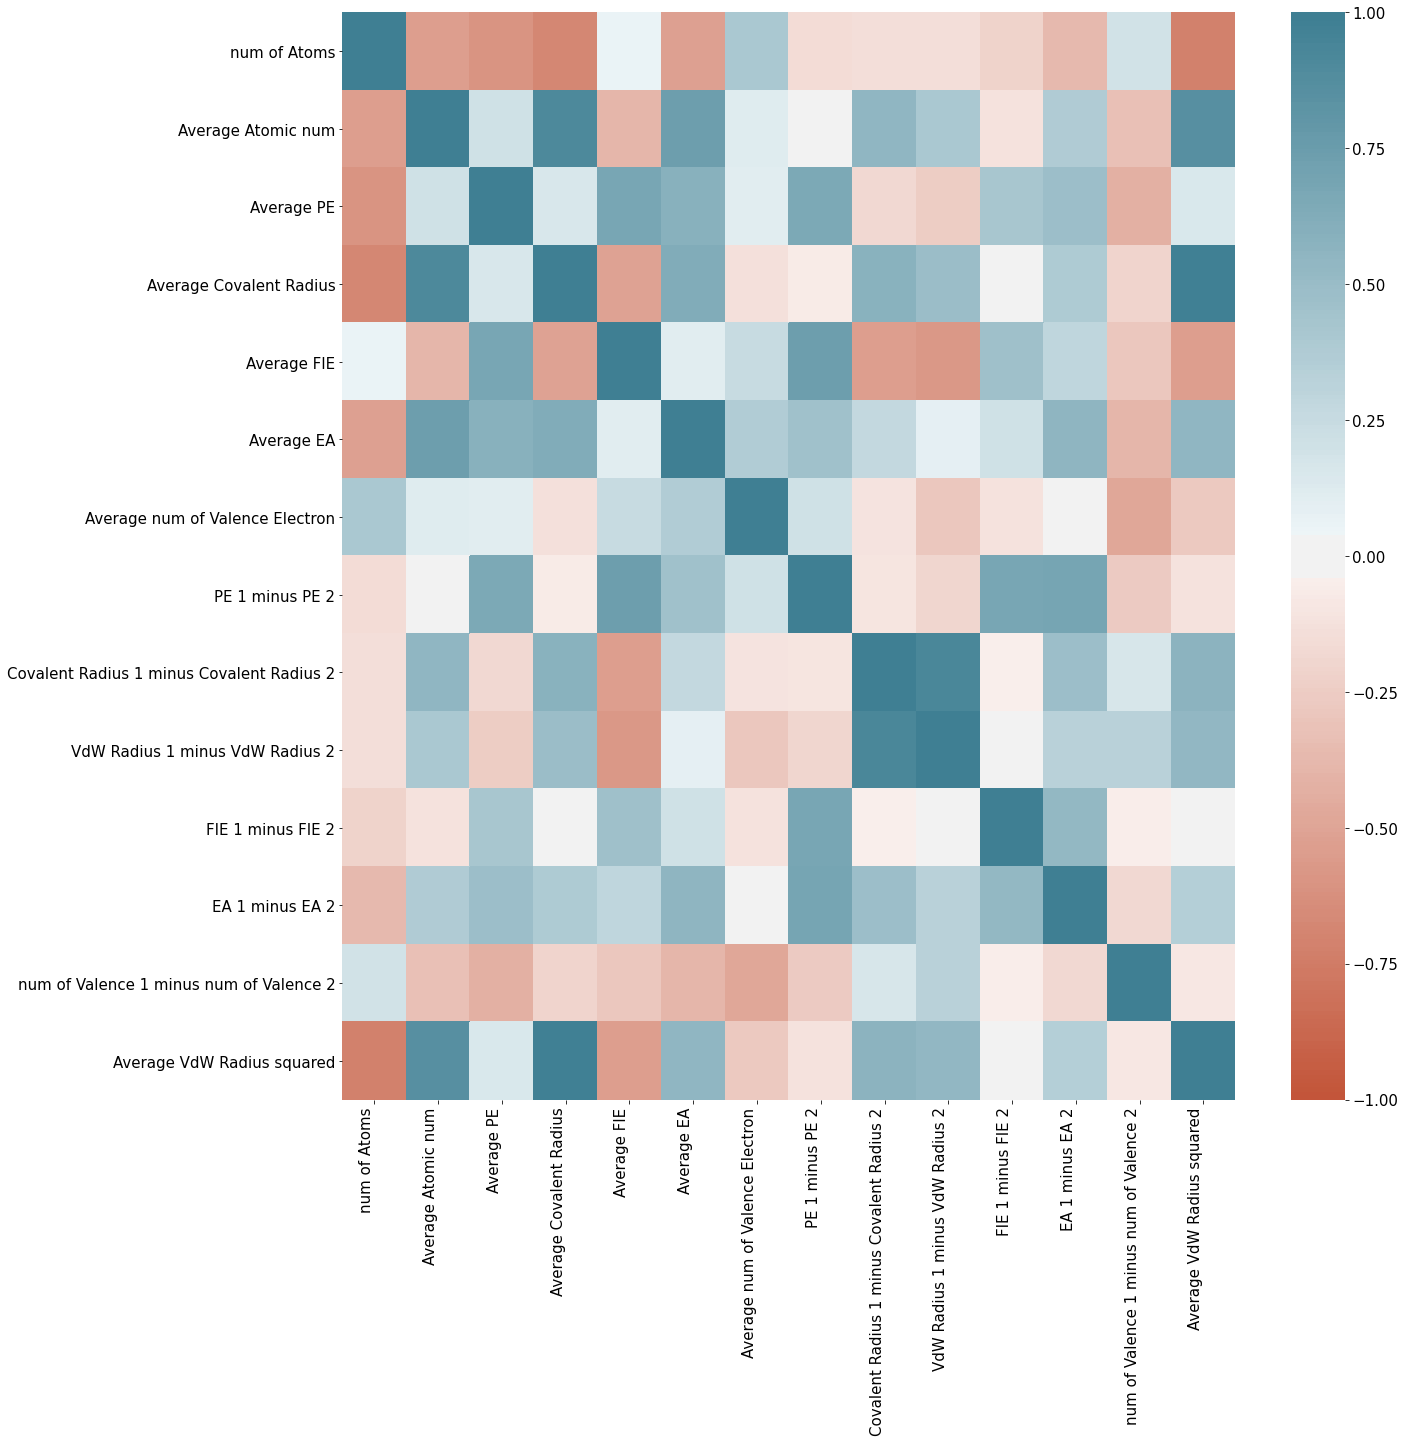

In [45]:
pearson_correlation(df_v5, last=True)

# 4. Hyperparameter Tuning

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [47]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [48]:
features = df_v5.iloc[:, 0:-1]
target = df_v5.iloc[:, -1]

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8],
    'colsample_bylevel': [0.1, 0.5, 0.8],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [50]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [51]:
xgbr_grid_cv.fit(features, target)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8],
                         'colsampl

In [52]:
xgbr_grid_cv.best_params_

{'colsample_bylevel': 0.1,
 'colsample_bytree': 0.8,
 'learning_rate': 1,
 'max_depth': 4,
 'min_child_weight': 10,
 'n_estimators': 300}

In [53]:
xgbr_grid_cv.best_score_

-0.007882902493661931

In [54]:
xgbr_grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [56]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [57]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.007882902493661931, 0.004736925061366389)

# 5. Different Separation Ratios

In [58]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [59]:
r2_results

[0.43427740533307907,
 0.6457626902079718,
 0.6964548772038455,
 0.7988622214041889,
 0.8519153879958508,
 0.8468196387633787,
 0.8493545472721129,
 0.8715582492153238,
 0.9090883745805166]

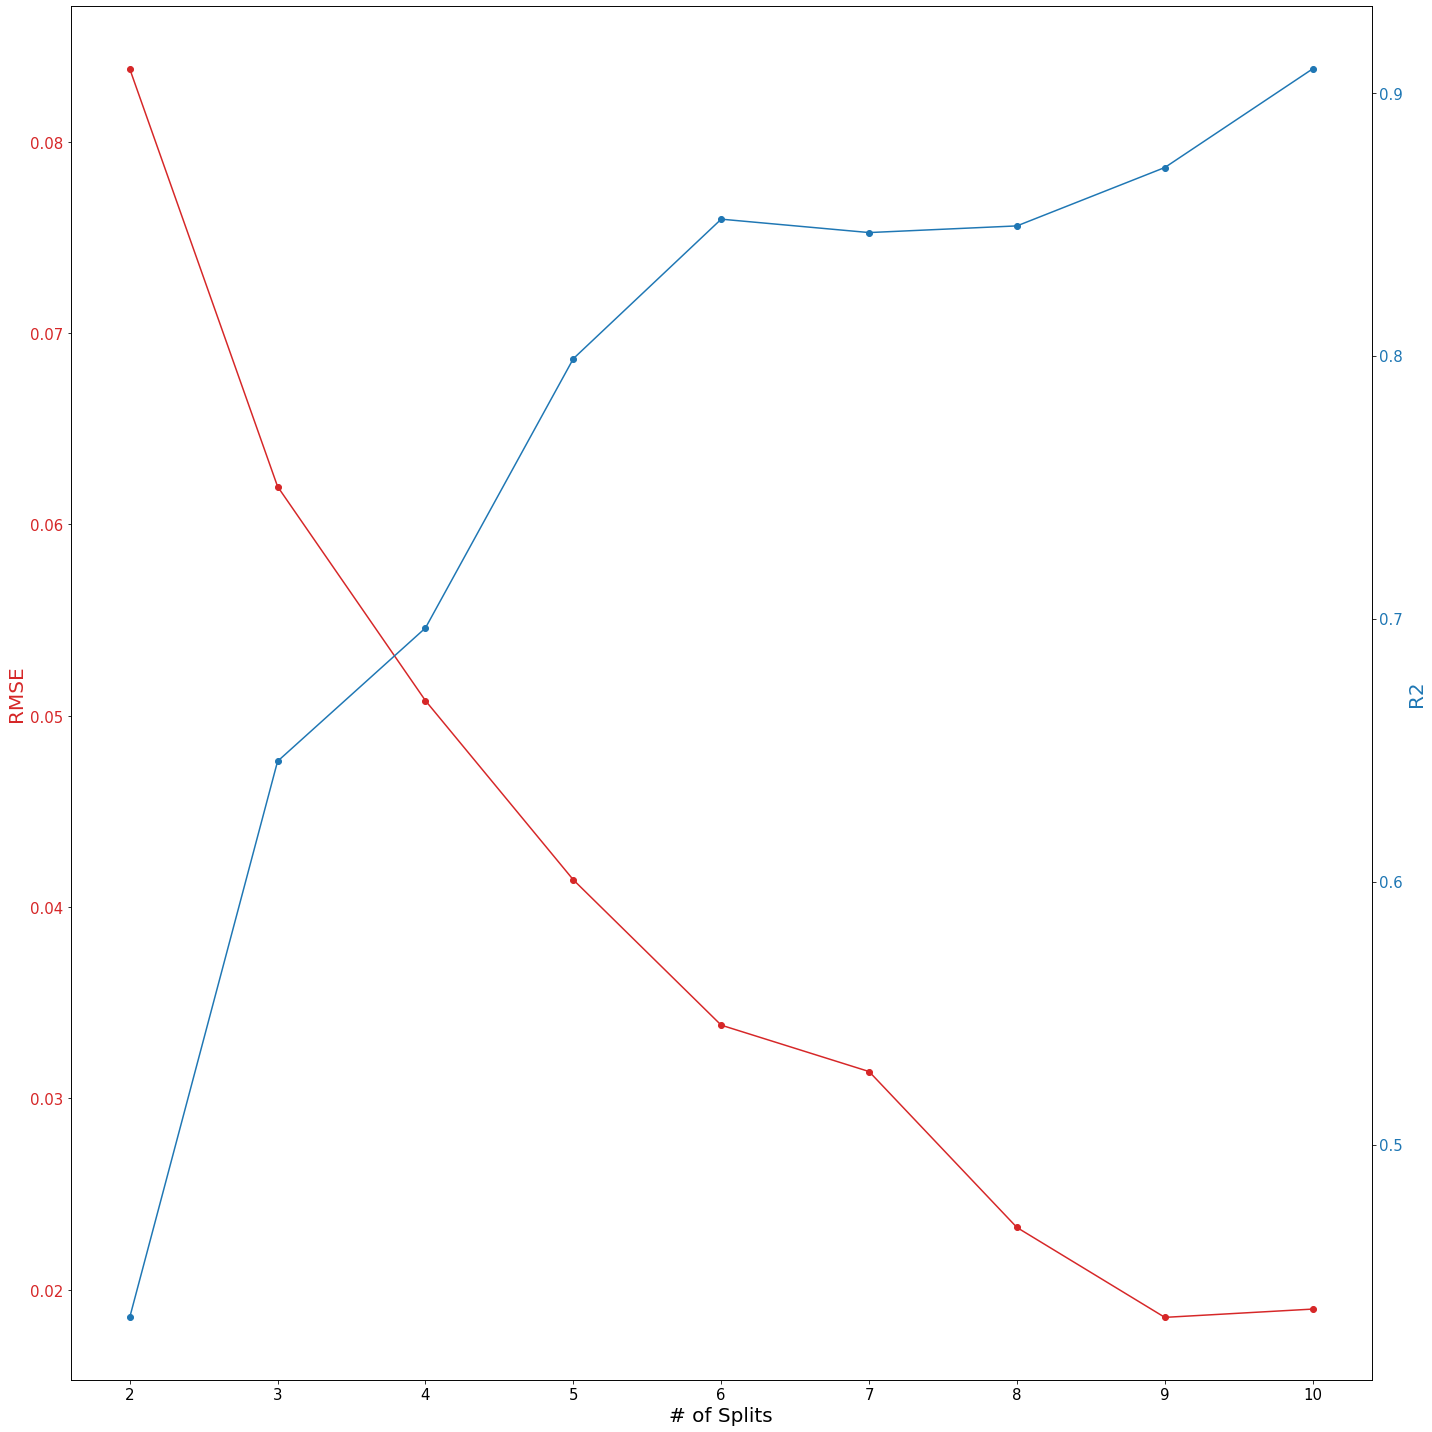

In [60]:
t = separations
data1 = rmse_results
data2 = r2_results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Splits', size = 20)
ax1.set_ylabel('RMSE', color=color, size = 20)
ax1.plot(t, data1, color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color, size = 20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [61]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [62]:
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - ETA: 0s - loss: 0.1701
Epoch 00001: val_loss improved from inf to 0.11390, saving model to model_best_weights.h5
1/1 [==============================] - 0s 169ms/step - loss: 0.1701 - val_loss: 0.1139
Epoch 2/1600
1/1 [==============================] - ETA: 0s - loss: 0.1868
Epoch 00002: val_loss improved from 0.11390 to 0.11322, saving model to model_best_weights.h5
1/1 [==============================] - 0s 42ms/step - loss: 0.1868 - val_loss: 0.1132
Epoch 3/1600
1/1 [==============================] - ETA: 0s - loss: 0.1704
Epoch 00003: val_loss improved from 0.11322 to 0.11240, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1704 - val_loss: 0.1124
Epoch 4/1600
1/1 [==============================] - ETA: 0s - loss: 0.1708
Epoch 00004: val_loss improved from 0.11240 to 0.11154, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.1708 - 

1/1 [==============================] - 0s 47ms/step - loss: 0.1228 - val_loss: 0.0740
Epoch 33/1600
1/1 [==============================] - ETA: 0s - loss: 0.1189
Epoch 00033: val_loss improved from 0.07402 to 0.07155, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.1189 - val_loss: 0.0716
Epoch 34/1600
1/1 [==============================] - ETA: 0s - loss: 0.1231
Epoch 00034: val_loss improved from 0.07155 to 0.06955, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1231 - val_loss: 0.0695
Epoch 35/1600
1/1 [==============================] - ETA: 0s - loss: 0.1166
Epoch 00035: val_loss improved from 0.06955 to 0.06751, saving model to model_best_weights.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1166 - val_loss: 0.0675
Epoch 36/1600
1/1 [==============================] - ETA: 0s - loss: 0.1203
Epoch 00036: val_loss improved from 0.06751 to 0.06707, saving model t

Epoch 70/1600
1/1 [==============================] - ETA: 0s - loss: 0.0853
Epoch 00070: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 16ms/step - loss: 0.0853 - val_loss: 0.0755
Epoch 71/1600
1/1 [==============================] - ETA: 0s - loss: 0.0731
Epoch 00071: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 16ms/step - loss: 0.0731 - val_loss: 0.0724
Epoch 72/1600
1/1 [==============================] - ETA: 0s - loss: 0.0787
Epoch 00072: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 17ms/step - loss: 0.0787 - val_loss: 0.0724
Epoch 73/1600
1/1 [==============================] - ETA: 0s - loss: 0.0808
Epoch 00073: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 16ms/step - loss: 0.0808 - val_loss: 0.0715
Epoch 74/1600
1/1 [==============================] - ETA: 0s - loss: 0.0720
Epoch 00074: val_loss did not improve from 0.06213
1/1 [================

Epoch 109/1600
1/1 [==============================] - ETA: 0s - loss: 0.0722
Epoch 00109: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 16ms/step - loss: 0.0722 - val_loss: 0.0741
Epoch 110/1600
1/1 [==============================] - ETA: 0s - loss: 0.0744
Epoch 00110: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 17ms/step - loss: 0.0744 - val_loss: 0.0700
Epoch 111/1600
1/1 [==============================] - ETA: 0s - loss: 0.0663
Epoch 00111: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 17ms/step - loss: 0.0663 - val_loss: 0.0685
Epoch 112/1600
1/1 [==============================] - ETA: 0s - loss: 0.0690
Epoch 00112: val_loss did not improve from 0.06213
1/1 [==============================] - 0s 16ms/step - loss: 0.0690 - val_loss: 0.0682
Epoch 113/1600
1/1 [==============================] - ETA: 0s - loss: 0.0508
Epoch 00113: val_loss did not improve from 0.06213
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0452
Epoch 00147: val_loss improved from 0.06213 to 0.06102, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.0452 - val_loss: 0.0610
Epoch 148/1600
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 00148: val_loss did not improve from 0.06102
1/1 [==============================] - 0s 16ms/step - loss: 0.0431 - val_loss: 0.0615
Epoch 149/1600
1/1 [==============================] - ETA: 0s - loss: 0.0490
Epoch 00149: val_loss did not improve from 0.06102
1/1 [==============================] - 0s 17ms/step - loss: 0.0490 - val_loss: 0.0637
Epoch 150/1600
1/1 [==============================] - ETA: 0s - loss: 0.0548
Epoch 00150: val_loss did not improve from 0.06102
1/1 [==============================] - 0s 18ms/step - loss: 0.0548 - val_loss: 0.0674
Epoch 151/1600
1/1 [==============================] - ETA: 0s - loss: 0.0405
Epoch 00151: val_loss did not improve f

Epoch 185/1600
1/1 [==============================] - ETA: 0s - loss: 0.0700
Epoch 00185: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0700 - val_loss: 0.0800
Epoch 186/1600
1/1 [==============================] - ETA: 0s - loss: 0.0602
Epoch 00186: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0602 - val_loss: 0.0798
Epoch 187/1600
1/1 [==============================] - ETA: 0s - loss: 0.0563
Epoch 00187: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0563 - val_loss: 0.0775
Epoch 188/1600
1/1 [==============================] - ETA: 0s - loss: 0.0543
Epoch 00188: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.0760
Epoch 189/1600
1/1 [==============================] - ETA: 0s - loss: 0.0561
Epoch 00189: val_loss did not improve from 0.06093
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0703
Epoch 00223: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 17ms/step - loss: 0.0703 - val_loss: 0.0810
Epoch 224/1600
1/1 [==============================] - ETA: 0s - loss: 0.0576
Epoch 00224: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0576 - val_loss: 0.0832
Epoch 225/1600
1/1 [==============================] - ETA: 0s - loss: 0.0558
Epoch 00225: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0558 - val_loss: 0.0851
Epoch 226/1600
1/1 [==============================] - ETA: 0s - loss: 0.0633
Epoch 00226: val_loss did not improve from 0.06093
1/1 [==============================] - 0s 16ms/step - loss: 0.0633 - val_loss: 0.0859
Epoch 227/1600
1/1 [==============================] - ETA: 0s - loss: 0.0523
Epoch 00227: val_loss did not improve from 0.06093
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0643
Epoch 00261: val_loss improved from 0.06093 to 0.06076, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0643 - val_loss: 0.0608
Epoch 262/1600
1/1 [==============================] - ETA: 0s - loss: 0.0805
Epoch 00262: val_loss improved from 0.06076 to 0.05849, saving model to model_best_weights.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0805 - val_loss: 0.0585
Epoch 263/1600
1/1 [==============================] - ETA: 0s - loss: 0.0594
Epoch 00263: val_loss improved from 0.05849 to 0.05625, saving model to model_best_weights.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.0594 - val_loss: 0.0563
Epoch 264/1600
1/1 [==============================] - ETA: 0s - loss: 0.0594
Epoch 00264: val_loss improved from 0.05625 to 0.05599, saving model to model_best_weights.h5
1/1 [==============================] - 0s 45ms/step - loss: 0.0594 - val_

1/1 [==============================] - ETA: 0s - loss: 0.0519
Epoch 00298: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 16ms/step - loss: 0.0519 - val_loss: 0.0821
Epoch 299/1600
1/1 [==============================] - ETA: 0s - loss: 0.0511
Epoch 00299: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 16ms/step - loss: 0.0511 - val_loss: 0.0863
Epoch 300/1600
1/1 [==============================] - ETA: 0s - loss: 0.0601
Epoch 00300: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 17ms/step - loss: 0.0601 - val_loss: 0.0798
Epoch 301/1600
1/1 [==============================] - ETA: 0s - loss: 0.1202
Epoch 00301: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 16ms/step - loss: 0.1202 - val_loss: 0.0721
Epoch 302/1600
1/1 [==============================] - ETA: 0s - loss: 0.0654
Epoch 00302: val_loss did not improve from 0.05421
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0657
Epoch 00336: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 16ms/step - loss: 0.0657 - val_loss: 0.0781
Epoch 337/1600
1/1 [==============================] - ETA: 0s - loss: 0.0642
Epoch 00337: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 16ms/step - loss: 0.0642 - val_loss: 0.0785
Epoch 338/1600
1/1 [==============================] - ETA: 0s - loss: 0.0711
Epoch 00338: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 16ms/step - loss: 0.0711 - val_loss: 0.0770
Epoch 339/1600
1/1 [==============================] - ETA: 0s - loss: 0.0701
Epoch 00339: val_loss did not improve from 0.05421
1/1 [==============================] - 0s 17ms/step - loss: 0.0701 - val_loss: 0.0768
Epoch 340/1600
1/1 [==============================] - ETA: 0s - loss: 0.0682
Epoch 00340: val_loss did not improve from 0.05421
1/1 [==========================

Epoch 374/1600
1/1 [==============================] - ETA: 0s - loss: 0.0848
Epoch 00374: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 15ms/step - loss: 0.0848 - val_loss: 0.0520
Epoch 375/1600
1/1 [==============================] - ETA: 0s - loss: 0.0607
Epoch 00375: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0607 - val_loss: 0.0552
Epoch 376/1600
1/1 [==============================] - ETA: 0s - loss: 0.0595
Epoch 00376: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 18ms/step - loss: 0.0595 - val_loss: 0.0524
Epoch 377/1600
1/1 [==============================] - ETA: 0s - loss: 0.0586
Epoch 00377: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0586 - val_loss: 0.0540
Epoch 378/1600
1/1 [==============================] - ETA: 0s - loss: 0.0796
Epoch 00378: val_loss did not improve from 0.03965
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0817
Epoch 00412: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0817 - val_loss: 0.0624
Epoch 413/1600
1/1 [==============================] - ETA: 0s - loss: 0.0632
Epoch 00413: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0632 - val_loss: 0.0623
Epoch 414/1600
1/1 [==============================] - ETA: 0s - loss: 0.0477
Epoch 00414: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0477 - val_loss: 0.0654
Epoch 415/1600
1/1 [==============================] - ETA: 0s - loss: 0.0654
Epoch 00415: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0654 - val_loss: 0.0662
Epoch 416/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 00416: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0751
Epoch 00450: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0751 - val_loss: 0.0622
Epoch 451/1600
1/1 [==============================] - ETA: 0s - loss: 0.0618
Epoch 00451: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0618 - val_loss: 0.0597
Epoch 452/1600
1/1 [==============================] - ETA: 0s - loss: 0.0589
Epoch 00452: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0589 - val_loss: 0.0565
Epoch 453/1600
1/1 [==============================] - ETA: 0s - loss: 0.0606
Epoch 00453: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0606 - val_loss: 0.0575
Epoch 454/1600
1/1 [==============================] - ETA: 0s - loss: 0.0693
Epoch 00454: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0569
Epoch 00488: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0569 - val_loss: 0.0787
Epoch 489/1600
1/1 [==============================] - ETA: 0s - loss: 0.0572
Epoch 00489: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0572 - val_loss: 0.0773
Epoch 490/1600
1/1 [==============================] - ETA: 0s - loss: 0.0652
Epoch 00490: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 18ms/step - loss: 0.0652 - val_loss: 0.0758
Epoch 491/1600
1/1 [==============================] - ETA: 0s - loss: 0.0524
Epoch 00491: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0524 - val_loss: 0.0767
Epoch 492/1600
1/1 [==============================] - ETA: 0s - loss: 0.0670
Epoch 00492: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0647
Epoch 00526: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0647 - val_loss: 0.0584
Epoch 527/1600
1/1 [==============================] - ETA: 0s - loss: 0.0547
Epoch 00527: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0547 - val_loss: 0.0554
Epoch 528/1600
1/1 [==============================] - ETA: 0s - loss: 0.0631
Epoch 00528: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0631 - val_loss: 0.0547
Epoch 529/1600
1/1 [==============================] - ETA: 0s - loss: 0.0770
Epoch 00529: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0770 - val_loss: 0.0549
Epoch 530/1600
1/1 [==============================] - ETA: 0s - loss: 0.0585
Epoch 00530: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0642
Epoch 00564: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0642 - val_loss: 0.0621
Epoch 565/1600
1/1 [==============================] - ETA: 0s - loss: 0.0554
Epoch 00565: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0554 - val_loss: 0.0616
Epoch 566/1600
1/1 [==============================] - ETA: 0s - loss: 0.0666
Epoch 00566: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0666 - val_loss: 0.0641
Epoch 567/1600
1/1 [==============================] - ETA: 0s - loss: 0.0488
Epoch 00567: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0488 - val_loss: 0.0652
Epoch 568/1600
1/1 [==============================] - ETA: 0s - loss: 0.0567
Epoch 00568: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0700
Epoch 00602: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0700 - val_loss: 0.0830
Epoch 603/1600
1/1 [==============================] - ETA: 0s - loss: 0.0817
Epoch 00603: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0817 - val_loss: 0.0833
Epoch 604/1600
1/1 [==============================] - ETA: 0s - loss: 0.0620
Epoch 00604: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0620 - val_loss: 0.0799
Epoch 605/1600
1/1 [==============================] - ETA: 0s - loss: 0.0799
Epoch 00605: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0799 - val_loss: 0.0754
Epoch 606/1600
1/1 [==============================] - ETA: 0s - loss: 0.0653
Epoch 00606: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0603
Epoch 00640: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0603 - val_loss: 0.0779
Epoch 641/1600
1/1 [==============================] - ETA: 0s - loss: 0.0719
Epoch 00641: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0719 - val_loss: 0.0775
Epoch 642/1600
1/1 [==============================] - ETA: 0s - loss: 0.0718
Epoch 00642: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0718 - val_loss: 0.0769
Epoch 643/1600
1/1 [==============================] - ETA: 0s - loss: 0.0657
Epoch 00643: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0657 - val_loss: 0.0777
Epoch 644/1600
1/1 [==============================] - ETA: 0s - loss: 0.0797
Epoch 00644: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0580
Epoch 00678: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0580 - val_loss: 0.0770
Epoch 679/1600
1/1 [==============================] - ETA: 0s - loss: 0.0727
Epoch 00679: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0727 - val_loss: 0.0760
Epoch 680/1600
1/1 [==============================] - ETA: 0s - loss: 0.0636
Epoch 00680: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0636 - val_loss: 0.0777
Epoch 681/1600
1/1 [==============================] - ETA: 0s - loss: 0.0689
Epoch 00681: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0689 - val_loss: 0.0806
Epoch 682/1600
1/1 [==============================] - ETA: 0s - loss: 0.0664
Epoch 00682: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0668
Epoch 00716: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0668 - val_loss: 0.0530
Epoch 717/1600
1/1 [==============================] - ETA: 0s - loss: 0.0568
Epoch 00717: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0568 - val_loss: 0.0547
Epoch 718/1600
1/1 [==============================] - ETA: 0s - loss: 0.0669
Epoch 00718: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0669 - val_loss: 0.0519
Epoch 719/1600
1/1 [==============================] - ETA: 0s - loss: 0.0719
Epoch 00719: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0719 - val_loss: 0.0527
Epoch 720/1600
1/1 [==============================] - ETA: 0s - loss: 0.0610
Epoch 00720: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0721
Epoch 00754: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0721 - val_loss: 0.0640
Epoch 755/1600
1/1 [==============================] - ETA: 0s - loss: 0.0543
Epoch 00755: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0543 - val_loss: 0.0651
Epoch 756/1600
1/1 [==============================] - ETA: 0s - loss: 0.0645
Epoch 00756: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0645 - val_loss: 0.0657
Epoch 757/1600
1/1 [==============================] - ETA: 0s - loss: 0.0807
Epoch 00757: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0807 - val_loss: 0.0682
Epoch 758/1600
1/1 [==============================] - ETA: 0s - loss: 0.0711
Epoch 00758: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0620
Epoch 00792: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0620 - val_loss: 0.0757
Epoch 793/1600
1/1 [==============================] - ETA: 0s - loss: 0.0555
Epoch 00793: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0555 - val_loss: 0.0770
Epoch 794/1600
1/1 [==============================] - ETA: 0s - loss: 0.0650
Epoch 00794: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0650 - val_loss: 0.0782
Epoch 795/1600
1/1 [==============================] - ETA: 0s - loss: 0.0701
Epoch 00795: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0701 - val_loss: 0.0834
Epoch 796/1600
1/1 [==============================] - ETA: 0s - loss: 0.0619
Epoch 00796: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0693
Epoch 00830: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0693 - val_loss: 0.1015
Epoch 831/1600
1/1 [==============================] - ETA: 0s - loss: 0.0763
Epoch 00831: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0763 - val_loss: 0.0986
Epoch 832/1600
1/1 [==============================] - ETA: 0s - loss: 0.0714
Epoch 00832: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0714 - val_loss: 0.0951
Epoch 833/1600
1/1 [==============================] - ETA: 0s - loss: 0.0657
Epoch 00833: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0657 - val_loss: 0.0901
Epoch 834/1600
1/1 [==============================] - ETA: 0s - loss: 0.0645
Epoch 00834: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0674
Epoch 00868: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0674 - val_loss: 0.0918
Epoch 869/1600
1/1 [==============================] - ETA: 0s - loss: 0.0591
Epoch 00869: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0591 - val_loss: 0.0915
Epoch 870/1600
1/1 [==============================] - ETA: 0s - loss: 0.0655
Epoch 00870: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0655 - val_loss: 0.0934
Epoch 871/1600
1/1 [==============================] - ETA: 0s - loss: 0.0738
Epoch 00871: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0738 - val_loss: 0.0915
Epoch 872/1600
1/1 [==============================] - ETA: 0s - loss: 0.0682
Epoch 00872: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0613
Epoch 00906: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0613 - val_loss: 0.0861
Epoch 907/1600
1/1 [==============================] - ETA: 0s - loss: 0.0782
Epoch 00907: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0782 - val_loss: 0.0852
Epoch 908/1600
1/1 [==============================] - ETA: 0s - loss: 0.0616
Epoch 00908: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0616 - val_loss: 0.0861
Epoch 909/1600
1/1 [==============================] - ETA: 0s - loss: 0.0660
Epoch 00909: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0660 - val_loss: 0.0866
Epoch 910/1600
1/1 [==============================] - ETA: 0s - loss: 0.0663
Epoch 00910: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0783
Epoch 00944: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0783 - val_loss: 0.0769
Epoch 945/1600
1/1 [==============================] - ETA: 0s - loss: 0.0773
Epoch 00945: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0773 - val_loss: 0.0795
Epoch 946/1600
1/1 [==============================] - ETA: 0s - loss: 0.0736
Epoch 00946: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0736 - val_loss: 0.0819
Epoch 947/1600
1/1 [==============================] - ETA: 0s - loss: 0.0683
Epoch 00947: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0683 - val_loss: 0.0854
Epoch 948/1600
1/1 [==============================] - ETA: 0s - loss: 0.0790
Epoch 00948: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0637
Epoch 00982: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0637 - val_loss: 0.0841
Epoch 983/1600
1/1 [==============================] - ETA: 0s - loss: 0.0579
Epoch 00983: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0579 - val_loss: 0.0820
Epoch 984/1600
1/1 [==============================] - ETA: 0s - loss: 0.0875
Epoch 00984: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0875 - val_loss: 0.0808
Epoch 985/1600
1/1 [==============================] - ETA: 0s - loss: 0.0651
Epoch 00985: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0651 - val_loss: 0.0779
Epoch 986/1600
1/1 [==============================] - ETA: 0s - loss: 0.0599
Epoch 00986: val_loss did not improve from 0.03965
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0838
Epoch 01020: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0838 - val_loss: 0.0731
Epoch 1021/1600
1/1 [==============================] - ETA: 0s - loss: 0.0618
Epoch 01021: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0618 - val_loss: 0.0722
Epoch 1022/1600
1/1 [==============================] - ETA: 0s - loss: 0.0770
Epoch 01022: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0770 - val_loss: 0.0737
Epoch 1023/1600
1/1 [==============================] - ETA: 0s - loss: 0.0526
Epoch 01023: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0526 - val_loss: 0.0747
Epoch 1024/1600
1/1 [==============================] - ETA: 0s - loss: 0.0683
Epoch 01024: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0770
Epoch 01058: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0770 - val_loss: 0.0750
Epoch 1059/1600
1/1 [==============================] - ETA: 0s - loss: 0.0585
Epoch 01059: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0585 - val_loss: 0.0785
Epoch 1060/1600
1/1 [==============================] - ETA: 0s - loss: 0.0725
Epoch 01060: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0725 - val_loss: 0.0813
Epoch 1061/1600
1/1 [==============================] - ETA: 0s - loss: 0.0614
Epoch 01061: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0614 - val_loss: 0.0814
Epoch 1062/1600
1/1 [==============================] - ETA: 0s - loss: 0.0807
Epoch 01062: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0782
Epoch 01096: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0782 - val_loss: 0.0815
Epoch 1097/1600
1/1 [==============================] - ETA: 0s - loss: 0.0609
Epoch 01097: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0609 - val_loss: 0.0825
Epoch 1098/1600
1/1 [==============================] - ETA: 0s - loss: 0.0693
Epoch 01098: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0693 - val_loss: 0.0814
Epoch 1099/1600
1/1 [==============================] - ETA: 0s - loss: 0.0729
Epoch 01099: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0729 - val_loss: 0.0794
Epoch 1100/1600
1/1 [==============================] - ETA: 0s - loss: 0.0577
Epoch 01100: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0614
Epoch 01134: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0614 - val_loss: 0.0869
Epoch 1135/1600
1/1 [==============================] - ETA: 0s - loss: 0.0717
Epoch 01135: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0717 - val_loss: 0.0878
Epoch 1136/1600
1/1 [==============================] - ETA: 0s - loss: 0.0653
Epoch 01136: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0653 - val_loss: 0.0863
Epoch 1137/1600
1/1 [==============================] - ETA: 0s - loss: 0.0827
Epoch 01137: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0827 - val_loss: 0.0855
Epoch 1138/1600
1/1 [==============================] - ETA: 0s - loss: 0.0460
Epoch 01138: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0563
Epoch 01172: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0563 - val_loss: 0.0725
Epoch 1173/1600
1/1 [==============================] - ETA: 0s - loss: 0.0632
Epoch 01173: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0632 - val_loss: 0.0731
Epoch 1174/1600
1/1 [==============================] - ETA: 0s - loss: 0.0671
Epoch 01174: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0671 - val_loss: 0.0733
Epoch 1175/1600
1/1 [==============================] - ETA: 0s - loss: 0.0604
Epoch 01175: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0604 - val_loss: 0.0731
Epoch 1176/1600
1/1 [==============================] - ETA: 0s - loss: 0.0650
Epoch 01176: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0490
Epoch 01210: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0490 - val_loss: 0.0760
Epoch 1211/1600
1/1 [==============================] - ETA: 0s - loss: 0.0801
Epoch 01211: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0801 - val_loss: 0.0751
Epoch 1212/1600
1/1 [==============================] - ETA: 0s - loss: 0.0645
Epoch 01212: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0645 - val_loss: 0.0745
Epoch 1213/1600
1/1 [==============================] - ETA: 0s - loss: 0.0850
Epoch 01213: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0850 - val_loss: 0.0740
Epoch 1214/1600
1/1 [==============================] - ETA: 0s - loss: 0.0693
Epoch 01214: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0637
Epoch 01248: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0637 - val_loss: 0.0745
Epoch 1249/1600
1/1 [==============================] - ETA: 0s - loss: 0.0707
Epoch 01249: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0707 - val_loss: 0.0734
Epoch 1250/1600
1/1 [==============================] - ETA: 0s - loss: 0.0533
Epoch 01250: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0533 - val_loss: 0.0731
Epoch 1251/1600
1/1 [==============================] - ETA: 0s - loss: 0.0684
Epoch 01251: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0684 - val_loss: 0.0718
Epoch 1252/1600
1/1 [==============================] - ETA: 0s - loss: 0.0651
Epoch 01252: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0500
Epoch 01286: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0500 - val_loss: 0.0673
Epoch 1287/1600
1/1 [==============================] - ETA: 0s - loss: 0.0572
Epoch 01287: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0572 - val_loss: 0.0673
Epoch 1288/1600
1/1 [==============================] - ETA: 0s - loss: 0.0609
Epoch 01288: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0609 - val_loss: 0.0675
Epoch 1289/1600
1/1 [==============================] - ETA: 0s - loss: 0.0741
Epoch 01289: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0741 - val_loss: 0.0676
Epoch 1290/1600
1/1 [==============================] - ETA: 0s - loss: 0.0617
Epoch 01290: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0698
Epoch 01324: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0698 - val_loss: 0.0659
Epoch 1325/1600
1/1 [==============================] - ETA: 0s - loss: 0.0596
Epoch 01325: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0596 - val_loss: 0.0679
Epoch 1326/1600
1/1 [==============================] - ETA: 0s - loss: 0.0752
Epoch 01326: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0752 - val_loss: 0.0688
Epoch 1327/1600
1/1 [==============================] - ETA: 0s - loss: 0.0552
Epoch 01327: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0552 - val_loss: 0.0681
Epoch 1328/1600
1/1 [==============================] - ETA: 0s - loss: 0.0640
Epoch 01328: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0512
Epoch 01362: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0512 - val_loss: 0.0652
Epoch 1363/1600
1/1 [==============================] - ETA: 0s - loss: 0.0626
Epoch 01363: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0626 - val_loss: 0.0619
Epoch 1364/1600
1/1 [==============================] - ETA: 0s - loss: 0.0668
Epoch 01364: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0668 - val_loss: 0.0615
Epoch 1365/1600
1/1 [==============================] - ETA: 0s - loss: 0.0544
Epoch 01365: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0544 - val_loss: 0.0596
Epoch 1366/1600
1/1 [==============================] - ETA: 0s - loss: 0.0563
Epoch 01366: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0542
Epoch 01400: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0542 - val_loss: 0.0597
Epoch 1401/1600
1/1 [==============================] - ETA: 0s - loss: 0.0543
Epoch 01401: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.0612
Epoch 1402/1600
1/1 [==============================] - ETA: 0s - loss: 0.0544
Epoch 01402: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0544 - val_loss: 0.0607
Epoch 1403/1600
1/1 [==============================] - ETA: 0s - loss: 0.0644
Epoch 01403: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0644 - val_loss: 0.0637
Epoch 1404/1600
1/1 [==============================] - ETA: 0s - loss: 0.0853
Epoch 01404: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0705
Epoch 01438: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0705 - val_loss: 0.0771
Epoch 1439/1600
1/1 [==============================] - ETA: 0s - loss: 0.0514
Epoch 01439: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0514 - val_loss: 0.0766
Epoch 1440/1600
1/1 [==============================] - ETA: 0s - loss: 0.0557
Epoch 01440: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0557 - val_loss: 0.0743
Epoch 1441/1600
1/1 [==============================] - ETA: 0s - loss: 0.0584
Epoch 01441: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0584 - val_loss: 0.0742
Epoch 1442/1600
1/1 [==============================] - ETA: 0s - loss: 0.0553
Epoch 01442: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0794
Epoch 01476: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0794 - val_loss: 0.0750
Epoch 1477/1600
1/1 [==============================] - ETA: 0s - loss: 0.0616
Epoch 01477: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0616 - val_loss: 0.0730
Epoch 1478/1600
1/1 [==============================] - ETA: 0s - loss: 0.0905
Epoch 01478: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0905 - val_loss: 0.0720
Epoch 1479/1600
1/1 [==============================] - ETA: 0s - loss: 0.0600
Epoch 01479: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0600 - val_loss: 0.0720
Epoch 1480/1600
1/1 [==============================] - ETA: 0s - loss: 0.0570
Epoch 01480: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0620
Epoch 01514: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0620 - val_loss: 0.0704
Epoch 1515/1600
1/1 [==============================] - ETA: 0s - loss: 0.0538
Epoch 01515: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0538 - val_loss: 0.0703
Epoch 1516/1600
1/1 [==============================] - ETA: 0s - loss: 0.0569
Epoch 01516: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0569 - val_loss: 0.0715
Epoch 1517/1600
1/1 [==============================] - ETA: 0s - loss: 0.0709
Epoch 01517: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0709 - val_loss: 0.0724
Epoch 1518/1600
1/1 [==============================] - ETA: 0s - loss: 0.0493
Epoch 01518: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0662
Epoch 01552: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 1553/1600
1/1 [==============================] - ETA: 0s - loss: 0.0572
Epoch 01553: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0572 - val_loss: 0.0658
Epoch 1554/1600
1/1 [==============================] - ETA: 0s - loss: 0.0599
Epoch 01554: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0599 - val_loss: 0.0657
Epoch 1555/1600
1/1 [==============================] - ETA: 0s - loss: 0.0539
Epoch 01555: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0539 - val_loss: 0.0664
Epoch 1556/1600
1/1 [==============================] - ETA: 0s - loss: 0.0669
Epoch 01556: val_loss did not improve from 0.03965
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0643
Epoch 01590: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0643 - val_loss: 0.0696
Epoch 1591/1600
1/1 [==============================] - ETA: 0s - loss: 0.0638
Epoch 01591: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0638 - val_loss: 0.0688
Epoch 1592/1600
1/1 [==============================] - ETA: 0s - loss: 0.0583
Epoch 01592: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 16ms/step - loss: 0.0583 - val_loss: 0.0694
Epoch 1593/1600
1/1 [==============================] - ETA: 0s - loss: 0.0536
Epoch 01593: val_loss did not improve from 0.03965
1/1 [==============================] - 0s 17ms/step - loss: 0.0536 - val_loss: 0.0684
Epoch 1594/1600
1/1 [==============================] - ETA: 0s - loss: 0.0690
Epoch 01594: val_loss did not improve from 0.03965
1/1 [======================

In [63]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [64]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - ETA: 0s - loss: 0.1432
Epoch 00001: val_loss improved from inf to 0.10832, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 137ms/step - loss: 0.1432 - val_loss: 0.1083
Epoch 2/1600
1/1 [==============================] - ETA: 0s - loss: 0.1515
Epoch 00002: val_loss improved from 0.10832 to 0.10754, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 40ms/step - loss: 0.1515 - val_loss: 0.1075
Epoch 3/1600
1/1 [==============================] - ETA: 0s - loss: 0.1357
Epoch 00003: val_loss improved from 0.10754 to 0.10667, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 48ms/step - loss: 0.1357 - val_loss: 0.1067
Epoch 4/1600
1/1 [==============================] - ETA: 0s - loss: 0.1413
Epoch 00004: val_loss improved from 0.10667 to 0.10574, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 52ms/step -

1/1 [==============================] - ETA: 0s - loss: 0.0993
Epoch 00032: val_loss improved from 0.06734 to 0.06586, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0993 - val_loss: 0.0659
Epoch 33/1600
1/1 [==============================] - ETA: 0s - loss: 0.1015
Epoch 00033: val_loss improved from 0.06586 to 0.06489, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 50ms/step - loss: 0.1015 - val_loss: 0.0649
Epoch 34/1600
1/1 [==============================] - ETA: 0s - loss: 0.1023
Epoch 00034: val_loss improved from 0.06489 to 0.06274, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.1023 - val_loss: 0.0627
Epoch 35/1600
1/1 [==============================] - ETA: 0s - loss: 0.1003
Epoch 00035: val_loss improved from 0.06274 to 0.06199, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 48ms/step - loss: 

1/1 [==============================] - 0s 47ms/step - loss: 0.0672 - val_loss: 0.0556
Epoch 68/1600
1/1 [==============================] - ETA: 0s - loss: 0.0655
Epoch 00068: val_loss improved from 0.05557 to 0.05514, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 64ms/step - loss: 0.0655 - val_loss: 0.0551
Epoch 69/1600
1/1 [==============================] - ETA: 0s - loss: 0.0574
Epoch 00069: val_loss improved from 0.05514 to 0.05451, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 52ms/step - loss: 0.0574 - val_loss: 0.0545
Epoch 70/1600
1/1 [==============================] - ETA: 0s - loss: 0.0674
Epoch 00070: val_loss improved from 0.05451 to 0.05406, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.0674 - val_loss: 0.0541
Epoch 71/1600
1/1 [==============================] - ETA: 0s - loss: 0.0630
Epoch 00071: val_loss improved from 0.05406 to 0.05401, sa

1/1 [==============================] - ETA: 0s - loss: 0.0450
Epoch 00103: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0450 - val_loss: 0.0562
Epoch 104/1600
1/1 [==============================] - ETA: 0s - loss: 0.0572
Epoch 00104: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0572 - val_loss: 0.0558
Epoch 105/1600
1/1 [==============================] - ETA: 0s - loss: 0.0575
Epoch 00105: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0575 - val_loss: 0.0588
Epoch 106/1600
1/1 [==============================] - ETA: 0s - loss: 0.0501
Epoch 00106: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0501 - val_loss: 0.0584
Epoch 107/1600
1/1 [==============================] - ETA: 0s - loss: 0.0493
Epoch 00107: val_loss did not improve from 0.04887
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0399
Epoch 00141: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0399 - val_loss: 0.0716
Epoch 142/1600
1/1 [==============================] - ETA: 0s - loss: 0.0459
Epoch 00142: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0459 - val_loss: 0.0709
Epoch 143/1600
1/1 [==============================] - ETA: 0s - loss: 0.0466
Epoch 00143: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0466 - val_loss: 0.0670
Epoch 144/1600
1/1 [==============================] - ETA: 0s - loss: 0.0500
Epoch 00144: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - val_loss: 0.0646
Epoch 145/1600
1/1 [==============================] - ETA: 0s - loss: 0.0415
Epoch 00145: val_loss did not improve from 0.04887
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0496
Epoch 00179: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0496 - val_loss: 0.0563
Epoch 180/1600
1/1 [==============================] - ETA: 0s - loss: 0.0413
Epoch 00180: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0413 - val_loss: 0.0567
Epoch 181/1600
1/1 [==============================] - ETA: 0s - loss: 0.0405
Epoch 00181: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0405 - val_loss: 0.0553
Epoch 182/1600
1/1 [==============================] - ETA: 0s - loss: 0.0379
Epoch 00182: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0379 - val_loss: 0.0561
Epoch 183/1600
1/1 [==============================] - ETA: 0s - loss: 0.0425
Epoch 00183: val_loss did not improve from 0.04887
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0424
Epoch 00217: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0424 - val_loss: 0.0573
Epoch 218/1600
1/1 [==============================] - ETA: 0s - loss: 0.0369
Epoch 00218: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0369 - val_loss: 0.0581
Epoch 219/1600
1/1 [==============================] - ETA: 0s - loss: 0.0315
Epoch 00219: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0315 - val_loss: 0.0597
Epoch 220/1600
1/1 [==============================] - ETA: 0s - loss: 0.0357
Epoch 00220: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0357 - val_loss: 0.0611
Epoch 221/1600
1/1 [==============================] - ETA: 0s - loss: 0.0411
Epoch 00221: val_loss did not improve from 0.04887
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0443
Epoch 00255: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 17ms/step - loss: 0.0443 - val_loss: 0.0576
Epoch 256/1600
1/1 [==============================] - ETA: 0s - loss: 0.0369
Epoch 00256: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0369 - val_loss: 0.0553
Epoch 257/1600
1/1 [==============================] - ETA: 0s - loss: 0.0394
Epoch 00257: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0394 - val_loss: 0.0522
Epoch 258/1600
1/1 [==============================] - ETA: 0s - loss: 0.0446
Epoch 00258: val_loss did not improve from 0.04887
1/1 [==============================] - 0s 16ms/step - loss: 0.0446 - val_loss: 0.0528
Epoch 259/1600
1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00259: val_loss did not improve from 0.04887
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0411
Epoch 00293: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 16ms/step - loss: 0.0411 - val_loss: 0.0541
Epoch 294/1600
1/1 [==============================] - ETA: 0s - loss: 0.0313
Epoch 00294: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 17ms/step - loss: 0.0313 - val_loss: 0.0588
Epoch 295/1600
1/1 [==============================] - ETA: 0s - loss: 0.0331
Epoch 00295: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 17ms/step - loss: 0.0331 - val_loss: 0.0592
Epoch 296/1600
1/1 [==============================] - ETA: 0s - loss: 0.0402
Epoch 00296: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 17ms/step - loss: 0.0402 - val_loss: 0.0551
Epoch 297/1600
1/1 [==============================] - ETA: 0s - loss: 0.0436
Epoch 00297: val_loss did not improve from 0.04775
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0383
Epoch 00331: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 17ms/step - loss: 0.0383 - val_loss: 0.0559
Epoch 332/1600
1/1 [==============================] - ETA: 0s - loss: 0.0382
Epoch 00332: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 16ms/step - loss: 0.0382 - val_loss: 0.0553
Epoch 333/1600
1/1 [==============================] - ETA: 0s - loss: 0.0349
Epoch 00333: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 17ms/step - loss: 0.0349 - val_loss: 0.0550
Epoch 334/1600
1/1 [==============================] - ETA: 0s - loss: 0.0407
Epoch 00334: val_loss did not improve from 0.04775
1/1 [==============================] - 0s 17ms/step - loss: 0.0407 - val_loss: 0.0549
Epoch 335/1600
1/1 [==============================] - ETA: 0s - loss: 0.0416
Epoch 00335: val_loss did not improve from 0.04775
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 00369: val_loss did not improve from 0.04307
1/1 [==============================] - 0s 16ms/step - loss: 0.0470 - val_loss: 0.0509
Epoch 370/1600
1/1 [==============================] - ETA: 0s - loss: 0.0368
Epoch 00370: val_loss did not improve from 0.04307
1/1 [==============================] - 0s 16ms/step - loss: 0.0368 - val_loss: 0.0541
Epoch 371/1600
1/1 [==============================] - ETA: 0s - loss: 0.0568
Epoch 00371: val_loss did not improve from 0.04307
1/1 [==============================] - 0s 17ms/step - loss: 0.0568 - val_loss: 0.0527
Epoch 372/1600
1/1 [==============================] - ETA: 0s - loss: 0.0366
Epoch 00372: val_loss did not improve from 0.04307
1/1 [==============================] - 0s 17ms/step - loss: 0.0366 - val_loss: 0.0525
Epoch 373/1600
1/1 [==============================] - ETA: 0s - loss: 0.0306
Epoch 00373: val_loss did not improve from 0.04307
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0301
Epoch 00407: val_loss did not improve from 0.04307
1/1 [==============================] - 0s 16ms/step - loss: 0.0301 - val_loss: 0.0452
Epoch 408/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 00408: val_loss did not improve from 0.04307
1/1 [==============================] - 0s 16ms/step - loss: 0.0337 - val_loss: 0.0433
Epoch 409/1600
1/1 [==============================] - ETA: 0s - loss: 0.0366
Epoch 00409: val_loss improved from 0.04307 to 0.04278, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 50ms/step - loss: 0.0366 - val_loss: 0.0428
Epoch 410/1600
1/1 [==============================] - ETA: 0s - loss: 0.0428
Epoch 00410: val_loss improved from 0.04278 to 0.04175, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 47ms/step - loss: 0.0428 - val_loss: 0.0418
Epoch 411/1600
1/1 [==============================] - ETA: 0s - l

Epoch 444/1600
1/1 [==============================] - ETA: 0s - loss: 0.0405
Epoch 00444: val_loss improved from 0.03310 to 0.03230, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 46ms/step - loss: 0.0405 - val_loss: 0.0323
Epoch 445/1600
1/1 [==============================] - ETA: 0s - loss: 0.0307
Epoch 00445: val_loss improved from 0.03230 to 0.03000, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 49ms/step - loss: 0.0307 - val_loss: 0.0300
Epoch 446/1600
1/1 [==============================] - ETA: 0s - loss: 0.0407
Epoch 00446: val_loss improved from 0.03000 to 0.02871, saving model to model_best_weights_mae.h5
1/1 [==============================] - 0s 46ms/step - loss: 0.0407 - val_loss: 0.0287
Epoch 447/1600
1/1 [==============================] - ETA: 0s - loss: 0.0320
Epoch 00447: val_loss did not improve from 0.02871
1/1 [==============================] - 0s 15ms/step - loss: 0.0320 - val_loss: 0.0321
Epo

Epoch 482/1600
1/1 [==============================] - ETA: 0s - loss: 0.0486
Epoch 00482: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0486 - val_loss: 0.0395
Epoch 483/1600
1/1 [==============================] - ETA: 0s - loss: 0.0270
Epoch 00483: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0270 - val_loss: 0.0424
Epoch 484/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 00484: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0371 - val_loss: 0.0359
Epoch 485/1600
1/1 [==============================] - ETA: 0s - loss: 0.0248
Epoch 00485: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0248 - val_loss: 0.0309
Epoch 486/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 00486: val_loss did not improve from 0.02560
1/1 [===========

1/1 [==============================] - ETA: 0s - loss: 0.0313
Epoch 00520: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0313 - val_loss: 0.0345
Epoch 521/1600
1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 00521: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0333 - val_loss: 0.0330
Epoch 522/1600
1/1 [==============================] - ETA: 0s - loss: 0.0306
Epoch 00522: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0306 - val_loss: 0.0321
Epoch 523/1600
1/1 [==============================] - ETA: 0s - loss: 0.0281
Epoch 00523: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0281 - val_loss: 0.0355
Epoch 524/1600
1/1 [==============================] - ETA: 0s - loss: 0.0447
Epoch 00524: val_loss did not improve from 0.02560
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0278
Epoch 00558: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0278 - val_loss: 0.0330
Epoch 559/1600
1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 00559: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0288
Epoch 560/1600
1/1 [==============================] - ETA: 0s - loss: 0.0329
Epoch 00560: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0329 - val_loss: 0.0299
Epoch 561/1600
1/1 [==============================] - ETA: 0s - loss: 0.0457
Epoch 00561: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0457 - val_loss: 0.0282
Epoch 562/1600
1/1 [==============================] - ETA: 0s - loss: 0.0367
Epoch 00562: val_loss did not improve from 0.02560
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0302
Epoch 00596: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0302 - val_loss: 0.0327
Epoch 597/1600
1/1 [==============================] - ETA: 0s - loss: 0.0291
Epoch 00597: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0291 - val_loss: 0.0337
Epoch 598/1600
1/1 [==============================] - ETA: 0s - loss: 0.0376
Epoch 00598: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0376 - val_loss: 0.0316
Epoch 599/1600
1/1 [==============================] - ETA: 0s - loss: 0.0396
Epoch 00599: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0396 - val_loss: 0.0324
Epoch 600/1600
1/1 [==============================] - ETA: 0s - loss: 0.0361
Epoch 00600: val_loss did not improve from 0.02560
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0395
Epoch 00634: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0395 - val_loss: 0.0311
Epoch 635/1600
1/1 [==============================] - ETA: 0s - loss: 0.0375
Epoch 00635: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 16ms/step - loss: 0.0375 - val_loss: 0.0293
Epoch 636/1600
1/1 [==============================] - ETA: 0s - loss: 0.0349
Epoch 00636: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0349 - val_loss: 0.0317
Epoch 637/1600
1/1 [==============================] - ETA: 0s - loss: 0.0263
Epoch 00637: val_loss did not improve from 0.02560
1/1 [==============================] - 0s 17ms/step - loss: 0.0263 - val_loss: 0.0336
Epoch 638/1600
1/1 [==============================] - ETA: 0s - loss: 0.0294
Epoch 00638: val_loss did not improve from 0.02560
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0288
Epoch 00672: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0288 - val_loss: 0.0336
Epoch 673/1600
1/1 [==============================] - ETA: 0s - loss: 0.0277
Epoch 00673: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0277 - val_loss: 0.0343
Epoch 674/1600
1/1 [==============================] - ETA: 0s - loss: 0.0423
Epoch 00674: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0423 - val_loss: 0.0335
Epoch 675/1600
1/1 [==============================] - ETA: 0s - loss: 0.0296
Epoch 00675: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0296 - val_loss: 0.0363
Epoch 676/1600
1/1 [==============================] - ETA: 0s - loss: 0.0423
Epoch 00676: val_loss did not improve from 0.02382
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 00710: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0372 - val_loss: 0.0308
Epoch 711/1600
1/1 [==============================] - ETA: 0s - loss: 0.0301
Epoch 00711: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 17ms/step - loss: 0.0301 - val_loss: 0.0315
Epoch 712/1600
1/1 [==============================] - ETA: 0s - loss: 0.0372
Epoch 00712: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0372 - val_loss: 0.0316
Epoch 713/1600
1/1 [==============================] - ETA: 0s - loss: 0.0342
Epoch 00713: val_loss did not improve from 0.02382
1/1 [==============================] - 0s 16ms/step - loss: 0.0342 - val_loss: 0.0338
Epoch 714/1600
1/1 [==============================] - ETA: 0s - loss: 0.0297
Epoch 00714: val_loss did not improve from 0.02382
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0418
Epoch 00748: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0418 - val_loss: 0.0265
Epoch 749/1600
1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 00749: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0370 - val_loss: 0.0258
Epoch 750/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 00750: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 17ms/step - loss: 0.0393 - val_loss: 0.0333
Epoch 751/1600
1/1 [==============================] - ETA: 0s - loss: 0.0398
Epoch 00751: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0398 - val_loss: 0.0311
Epoch 752/1600
1/1 [==============================] - ETA: 0s - loss: 0.0381
Epoch 00752: val_loss did not improve from 0.02265
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0328
Epoch 00786: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0328 - val_loss: 0.0238
Epoch 787/1600
1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 00787: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0258
Epoch 788/1600
1/1 [==============================] - ETA: 0s - loss: 0.0350
Epoch 00788: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0350 - val_loss: 0.0317
Epoch 789/1600
1/1 [==============================] - ETA: 0s - loss: 0.0296
Epoch 00789: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 17ms/step - loss: 0.0296 - val_loss: 0.0275
Epoch 790/1600
1/1 [==============================] - ETA: 0s - loss: 0.0447
Epoch 00790: val_loss did not improve from 0.02265
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0409
Epoch 00824: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0409 - val_loss: 0.0355
Epoch 825/1600
1/1 [==============================] - ETA: 0s - loss: 0.0337
Epoch 00825: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0337 - val_loss: 0.0336
Epoch 826/1600
1/1 [==============================] - ETA: 0s - loss: 0.0461
Epoch 00826: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 16ms/step - loss: 0.0461 - val_loss: 0.0356
Epoch 827/1600
1/1 [==============================] - ETA: 0s - loss: 0.0395
Epoch 00827: val_loss did not improve from 0.02265
1/1 [==============================] - 0s 17ms/step - loss: 0.0395 - val_loss: 0.0365
Epoch 828/1600
1/1 [==============================] - ETA: 0s - loss: 0.0475
Epoch 00828: val_loss did not improve from 0.02265
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0355
Epoch 00862: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0355 - val_loss: 0.0295
Epoch 863/1600
1/1 [==============================] - ETA: 0s - loss: 0.0359
Epoch 00863: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0359 - val_loss: 0.0347
Epoch 864/1600
1/1 [==============================] - ETA: 0s - loss: 0.0396
Epoch 00864: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0396 - val_loss: 0.0332
Epoch 865/1600
1/1 [==============================] - ETA: 0s - loss: 0.0344
Epoch 00865: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0344 - val_loss: 0.0270
Epoch 866/1600
1/1 [==============================] - ETA: 0s - loss: 0.0397
Epoch 00866: val_loss did not improve from 0.02197
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0397
Epoch 00900: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0397 - val_loss: 0.0327
Epoch 901/1600
1/1 [==============================] - ETA: 0s - loss: 0.0439
Epoch 00901: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.0303
Epoch 902/1600
1/1 [==============================] - ETA: 0s - loss: 0.0376
Epoch 00902: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0376 - val_loss: 0.0272
Epoch 903/1600
1/1 [==============================] - ETA: 0s - loss: 0.0355
Epoch 00903: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0355 - val_loss: 0.0319
Epoch 904/1600
1/1 [==============================] - ETA: 0s - loss: 0.0410
Epoch 00904: val_loss did not improve from 0.02197
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0342
Epoch 00938: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0342 - val_loss: 0.0396
Epoch 939/1600
1/1 [==============================] - ETA: 0s - loss: 0.0414
Epoch 00939: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0414 - val_loss: 0.0420
Epoch 940/1600
1/1 [==============================] - ETA: 0s - loss: 0.0341
Epoch 00940: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0341 - val_loss: 0.0409
Epoch 941/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 00941: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0393 - val_loss: 0.0345
Epoch 942/1600
1/1 [==============================] - ETA: 0s - loss: 0.0336
Epoch 00942: val_loss did not improve from 0.02197
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0369
Epoch 00976: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0369 - val_loss: 0.0310
Epoch 977/1600
1/1 [==============================] - ETA: 0s - loss: 0.0426
Epoch 00977: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0426 - val_loss: 0.0339
Epoch 978/1600
1/1 [==============================] - ETA: 0s - loss: 0.0365
Epoch 00978: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0365 - val_loss: 0.0341
Epoch 979/1600
1/1 [==============================] - ETA: 0s - loss: 0.0442
Epoch 00979: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0442 - val_loss: 0.0352
Epoch 980/1600
1/1 [==============================] - ETA: 0s - loss: 0.0396
Epoch 00980: val_loss did not improve from 0.02197
1/1 [==========================

1/1 [==============================] - ETA: 0s - loss: 0.0419
Epoch 01014: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0419 - val_loss: 0.0393
Epoch 1015/1600
1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 01015: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - val_loss: 0.0323
Epoch 1016/1600
1/1 [==============================] - ETA: 0s - loss: 0.0393
Epoch 01016: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0393 - val_loss: 0.0314
Epoch 1017/1600
1/1 [==============================] - ETA: 0s - loss: 0.0377
Epoch 01017: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0377 - val_loss: 0.0277
Epoch 1018/1600
1/1 [==============================] - ETA: 0s - loss: 0.0470
Epoch 01018: val_loss did not improve from 0.02197
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0433
Epoch 01052: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0433 - val_loss: 0.0389
Epoch 1053/1600
1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 01053: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0387 - val_loss: 0.0404
Epoch 1054/1600
1/1 [==============================] - ETA: 0s - loss: 0.0404
Epoch 01054: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 16ms/step - loss: 0.0404 - val_loss: 0.0397
Epoch 1055/1600
1/1 [==============================] - ETA: 0s - loss: 0.0518
Epoch 01055: val_loss did not improve from 0.02197
1/1 [==============================] - 0s 17ms/step - loss: 0.0518 - val_loss: 0.0356
Epoch 1056/1600
1/1 [==============================] - ETA: 0s - loss: 0.0388
Epoch 01056: val_loss did not improve from 0.02197
1/1 [======================

Epoch 1090/1600
1/1 [==============================] - ETA: 0s - loss: 0.0360
Epoch 01090: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0360 - val_loss: 0.0317
Epoch 1091/1600
1/1 [==============================] - ETA: 0s - loss: 0.0308
Epoch 01091: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0308 - val_loss: 0.0303
Epoch 1092/1600
1/1 [==============================] - ETA: 0s - loss: 0.0396
Epoch 01092: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0396 - val_loss: 0.0325
Epoch 1093/1600
1/1 [==============================] - ETA: 0s - loss: 0.0380
Epoch 01093: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0380 - val_loss: 0.0343
Epoch 1094/1600
1/1 [==============================] - ETA: 0s - loss: 0.0363
Epoch 01094: val_loss did not improve from 0.02163
1/1 [======

1/1 [==============================] - ETA: 0s - loss: 0.0493
Epoch 01128: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0493 - val_loss: 0.0406
Epoch 1129/1600
1/1 [==============================] - ETA: 0s - loss: 0.0389
Epoch 01129: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.0337
Epoch 1130/1600
1/1 [==============================] - ETA: 0s - loss: 0.0330
Epoch 01130: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0330 - val_loss: 0.0326
Epoch 1131/1600
1/1 [==============================] - ETA: 0s - loss: 0.0390
Epoch 01131: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0390 - val_loss: 0.0333
Epoch 1132/1600
1/1 [==============================] - ETA: 0s - loss: 0.0507
Epoch 01132: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0312
Epoch 01166: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0312 - val_loss: 0.0274
Epoch 1167/1600
1/1 [==============================] - ETA: 0s - loss: 0.0370
Epoch 01167: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0370 - val_loss: 0.0313
Epoch 1168/1600
1/1 [==============================] - ETA: 0s - loss: 0.0358
Epoch 01168: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0358 - val_loss: 0.0330
Epoch 1169/1600
1/1 [==============================] - ETA: 0s - loss: 0.0327
Epoch 01169: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0327 - val_loss: 0.0356
Epoch 1170/1600
1/1 [==============================] - ETA: 0s - loss: 0.0425
Epoch 01170: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0453
Epoch 01204: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0453 - val_loss: 0.0300
Epoch 1205/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 01205: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0371 - val_loss: 0.0317
Epoch 1206/1600
1/1 [==============================] - ETA: 0s - loss: 0.0438
Epoch 01206: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0438 - val_loss: 0.0339
Epoch 1207/1600
1/1 [==============================] - ETA: 0s - loss: 0.0384
Epoch 01207: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0384 - val_loss: 0.0338
Epoch 1208/1600
1/1 [==============================] - ETA: 0s - loss: 0.0362
Epoch 01208: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0404
Epoch 01242: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0404 - val_loss: 0.0319
Epoch 1243/1600
1/1 [==============================] - ETA: 0s - loss: 0.0429
Epoch 01243: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0429 - val_loss: 0.0372
Epoch 1244/1600
1/1 [==============================] - ETA: 0s - loss: 0.0348
Epoch 01244: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0348 - val_loss: 0.0333
Epoch 1245/1600
1/1 [==============================] - ETA: 0s - loss: 0.0334
Epoch 01245: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0334 - val_loss: 0.0269
Epoch 1246/1600
1/1 [==============================] - ETA: 0s - loss: 0.0338
Epoch 01246: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0312
Epoch 01280: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0312 - val_loss: 0.0292
Epoch 1281/1600
1/1 [==============================] - ETA: 0s - loss: 0.0446
Epoch 01281: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0446 - val_loss: 0.0275
Epoch 1282/1600
1/1 [==============================] - ETA: 0s - loss: 0.0345
Epoch 01282: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0345 - val_loss: 0.0309
Epoch 1283/1600
1/1 [==============================] - ETA: 0s - loss: 0.0294
Epoch 01283: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0294 - val_loss: 0.0330
Epoch 1284/1600
1/1 [==============================] - ETA: 0s - loss: 0.0465
Epoch 01284: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0415
Epoch 01318: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0415 - val_loss: 0.0299
Epoch 1319/1600
1/1 [==============================] - ETA: 0s - loss: 0.0377
Epoch 01319: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0377 - val_loss: 0.0298
Epoch 1320/1600
1/1 [==============================] - ETA: 0s - loss: 0.0414
Epoch 01320: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0414 - val_loss: 0.0291
Epoch 1321/1600
1/1 [==============================] - ETA: 0s - loss: 0.0409
Epoch 01321: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0409 - val_loss: 0.0289
Epoch 1322/1600
1/1 [==============================] - ETA: 0s - loss: 0.0374
Epoch 01322: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0356
Epoch 01356: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0356 - val_loss: 0.0296
Epoch 1357/1600
1/1 [==============================] - ETA: 0s - loss: 0.0344
Epoch 01357: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0344 - val_loss: 0.0299
Epoch 1358/1600
1/1 [==============================] - ETA: 0s - loss: 0.0330
Epoch 01358: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0330 - val_loss: 0.0283
Epoch 1359/1600
1/1 [==============================] - ETA: 0s - loss: 0.0323
Epoch 01359: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0323 - val_loss: 0.0278
Epoch 1360/1600
1/1 [==============================] - ETA: 0s - loss: 0.0462
Epoch 01360: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0365
Epoch 01394: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0365 - val_loss: 0.0274
Epoch 1395/1600
1/1 [==============================] - ETA: 0s - loss: 0.0354
Epoch 01395: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0354 - val_loss: 0.0284
Epoch 1396/1600
1/1 [==============================] - ETA: 0s - loss: 0.0324
Epoch 01396: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0324 - val_loss: 0.0278
Epoch 1397/1600
1/1 [==============================] - ETA: 0s - loss: 0.0378
Epoch 01397: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0378 - val_loss: 0.0272
Epoch 1398/1600
1/1 [==============================] - ETA: 0s - loss: 0.0347
Epoch 01398: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0290
Epoch 01432: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0290 - val_loss: 0.0334
Epoch 1433/1600
1/1 [==============================] - ETA: 0s - loss: 0.0389
Epoch 01433: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0389 - val_loss: 0.0366
Epoch 1434/1600
1/1 [==============================] - ETA: 0s - loss: 0.0342
Epoch 01434: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0342 - val_loss: 0.0393
Epoch 1435/1600
1/1 [==============================] - ETA: 0s - loss: 0.0455
Epoch 01435: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0455 - val_loss: 0.0422
Epoch 1436/1600
1/1 [==============================] - ETA: 0s - loss: 0.0296
Epoch 01436: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 01470: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0420 - val_loss: 0.0348
Epoch 1471/1600
1/1 [==============================] - ETA: 0s - loss: 0.0309
Epoch 01471: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0309 - val_loss: 0.0316
Epoch 1472/1600
1/1 [==============================] - ETA: 0s - loss: 0.0461
Epoch 01472: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0461 - val_loss: 0.0268
Epoch 1473/1600
1/1 [==============================] - ETA: 0s - loss: 0.0341
Epoch 01473: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0341 - val_loss: 0.0318
Epoch 1474/1600
1/1 [==============================] - ETA: 0s - loss: 0.0423
Epoch 01474: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0373
Epoch 01508: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0373 - val_loss: 0.0360
Epoch 1509/1600
1/1 [==============================] - ETA: 0s - loss: 0.0371
Epoch 01509: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0371 - val_loss: 0.0365
Epoch 1510/1600
1/1 [==============================] - ETA: 0s - loss: 0.0327
Epoch 01510: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0327 - val_loss: 0.0340
Epoch 1511/1600
1/1 [==============================] - ETA: 0s - loss: 0.0398
Epoch 01511: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0398 - val_loss: 0.0273
Epoch 1512/1600
1/1 [==============================] - ETA: 0s - loss: 0.0440
Epoch 01512: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0339
Epoch 01546: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0339 - val_loss: 0.0325
Epoch 1547/1600
1/1 [==============================] - ETA: 0s - loss: 0.0363
Epoch 01547: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0363 - val_loss: 0.0367
Epoch 1548/1600
1/1 [==============================] - ETA: 0s - loss: 0.0364
Epoch 01548: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0364 - val_loss: 0.0380
Epoch 1549/1600
1/1 [==============================] - ETA: 0s - loss: 0.0282
Epoch 01549: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0282 - val_loss: 0.0392
Epoch 1550/1600
1/1 [==============================] - ETA: 0s - loss: 0.0400
Epoch 01550: val_loss did not improve from 0.02163
1/1 [======================

1/1 [==============================] - ETA: 0s - loss: 0.0387
Epoch 01584: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0387 - val_loss: 0.0279
Epoch 1585/1600
1/1 [==============================] - ETA: 0s - loss: 0.0380
Epoch 01585: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0380 - val_loss: 0.0221
Epoch 1586/1600
1/1 [==============================] - ETA: 0s - loss: 0.0339
Epoch 01586: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 16ms/step - loss: 0.0339 - val_loss: 0.0260
Epoch 1587/1600
1/1 [==============================] - ETA: 0s - loss: 0.0333
Epoch 01587: val_loss did not improve from 0.02163
1/1 [==============================] - 0s 17ms/step - loss: 0.0333 - val_loss: 0.0243
Epoch 1588/1600
1/1 [==============================] - ETA: 0s - loss: 0.0402
Epoch 01588: val_loss did not improve from 0.02163
1/1 [======================

In [65]:
nn_MAE = min(model_history_mae.history['val_loss'])

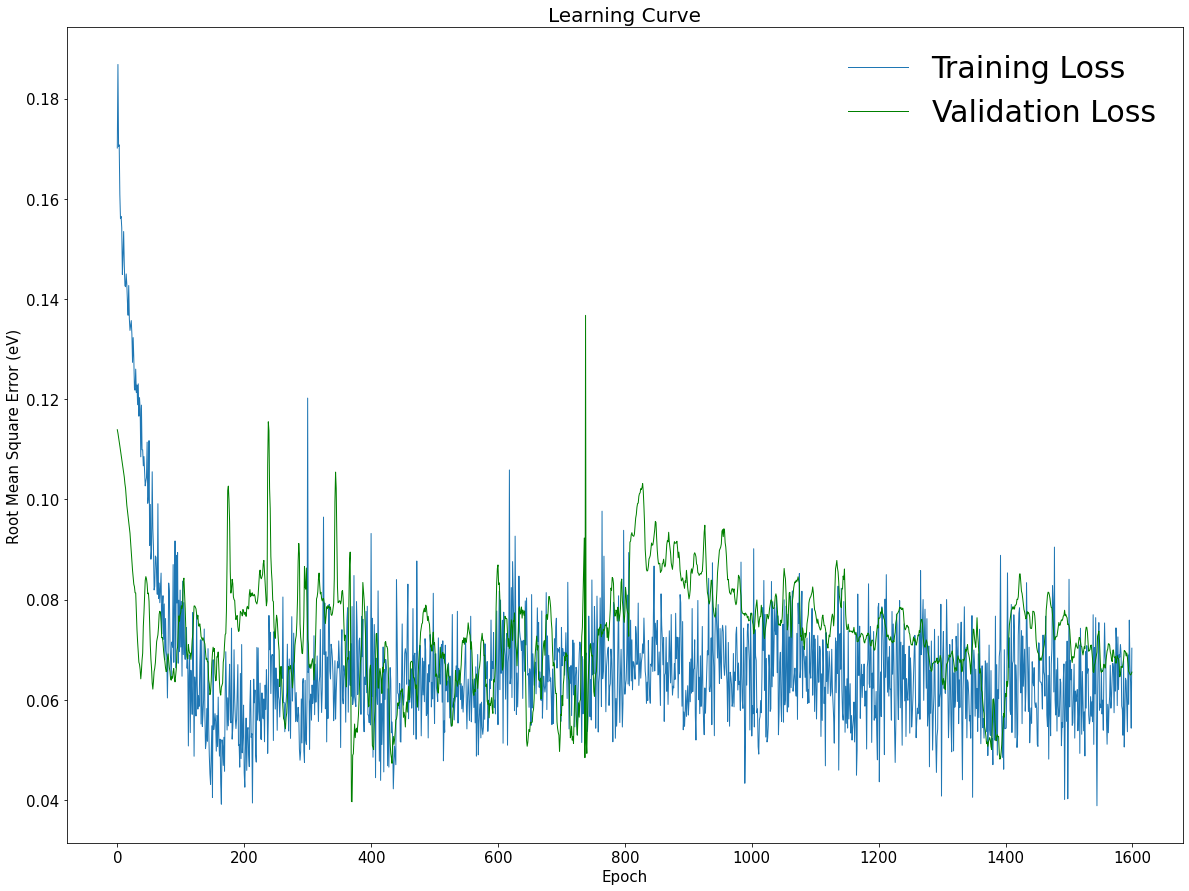

In [66]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

plt.figure(figsize=(20, 15))
plt.plot(training_losses, label="Training Loss", linewidth = 1)
plt.plot(validation_losses, label="Validation Loss", linewidth = 1, c='g')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Root Mean Square Error (eV)', fontsize = 15)
plt.legend(frameon=False, fontsize = 30);

# 6. Regressor Performance Plots

In [67]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [80]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(-0.1, -0.325, name, fontsize=18)
            ax[0, i].text(-0.1, -0.355, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[0, i].text(-0.1, -0.385, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[0, i].text(-0.1, -0.415, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(-0.1, -0.325, name, fontsize=18)
            ax[1, i - 4].text(-0.1, -0.355, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[1, i - 4].text(-0.1, -0.385, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[1, i - 4].text(-0.1, -0.415, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=25)
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='o', s=25)
        #ax[0,i].set_title(name, fontsize=15)

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=25)
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='o', s=25)
        # ax[1,i-4].set_title(name, fontsize=15)

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

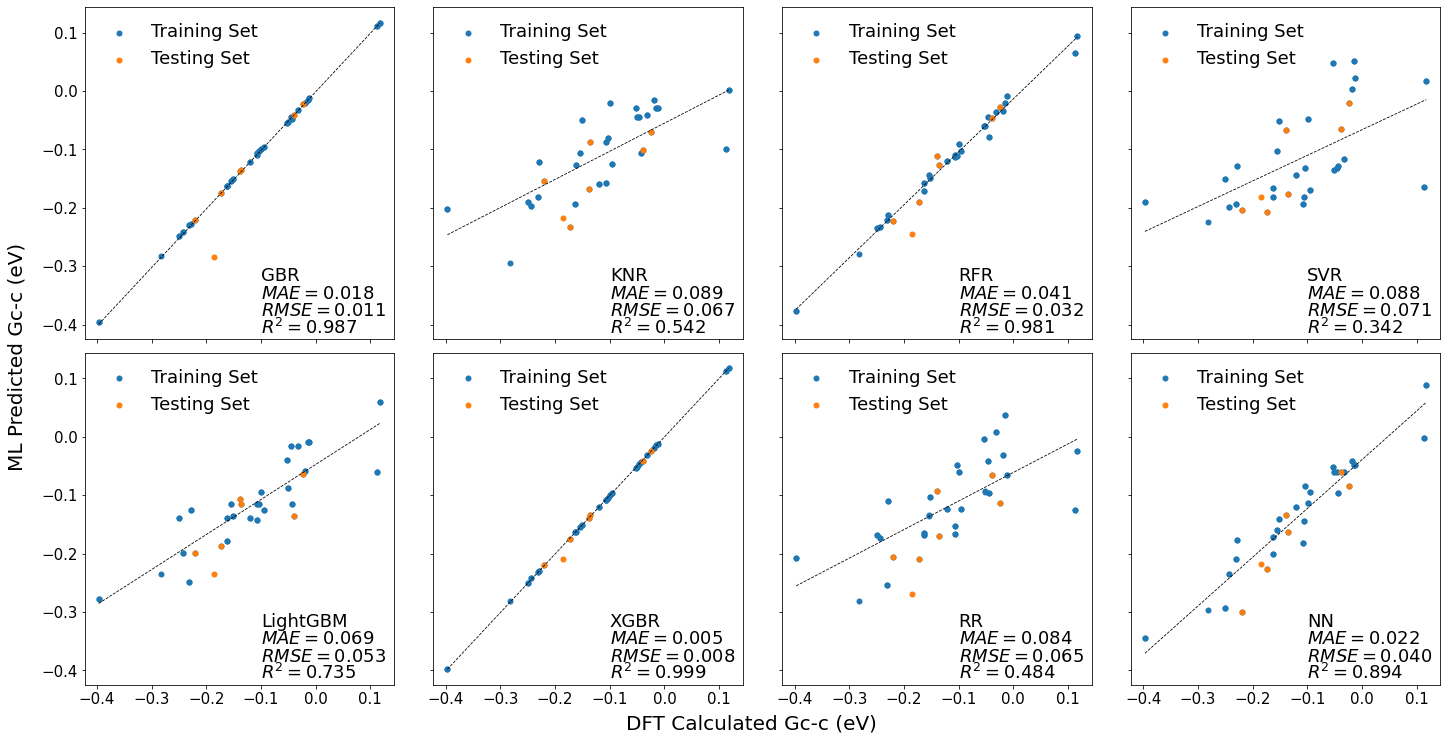

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df.iloc[-1, 0][0],
    KNR: results_df.iloc[-1, 1][0],
    RFR: results_df.iloc[-1, 2][0],
    SR: results_df.iloc[-1, 3][0],
    light: results_df.iloc[-1, 6][0],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df.iloc[-1, 4][0],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df.iloc[-1, 0][1],
    KNR: results_df.iloc[-1, 1][1],
    RFR: results_df.iloc[-1, 2][1],
    SR: results_df.iloc[-1, 3][1],
    light: results_df.iloc[-1, 6][1],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df.iloc[-1, 4][1],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.01, 'DFT Calculated Gc-c (eV)', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'ML Predicted Gc-c (eV)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);

# 7. XGBR Prediction on Full Dataset

In [124]:
prediction_df = pd.read_csv('CO Difference Full Data (with I).csv')

In [125]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [126]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_C2O2 - Gco,G_CHO - Gco,Difference
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,11.83,0.40,185.45,2.31,64.00,36.00,185.50,-0.01526,0.17026,-0.18552
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.06446,0.29583,-0.23137
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN,NaN,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN,NaN,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN,NaN,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN,NaN,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN,NaN,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN,NaN,NaN


In [127]:
# Savings the Gco column
targets = prediction_df['Difference']

In [128]:
diff = prediction_df.columns.difference(test_data.columns)

In [129]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [130]:
prediction_df.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'Average VdW Radius squared'],
      dtype='object')

In [131]:
df_v5.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average FIE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'Average VdW Radius squared', 'Difference'],
      dtype='object')

In [132]:
def scaler(df):
    
    base = pd.read_csv('Difference Full Data.csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'Difference'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'Difference':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


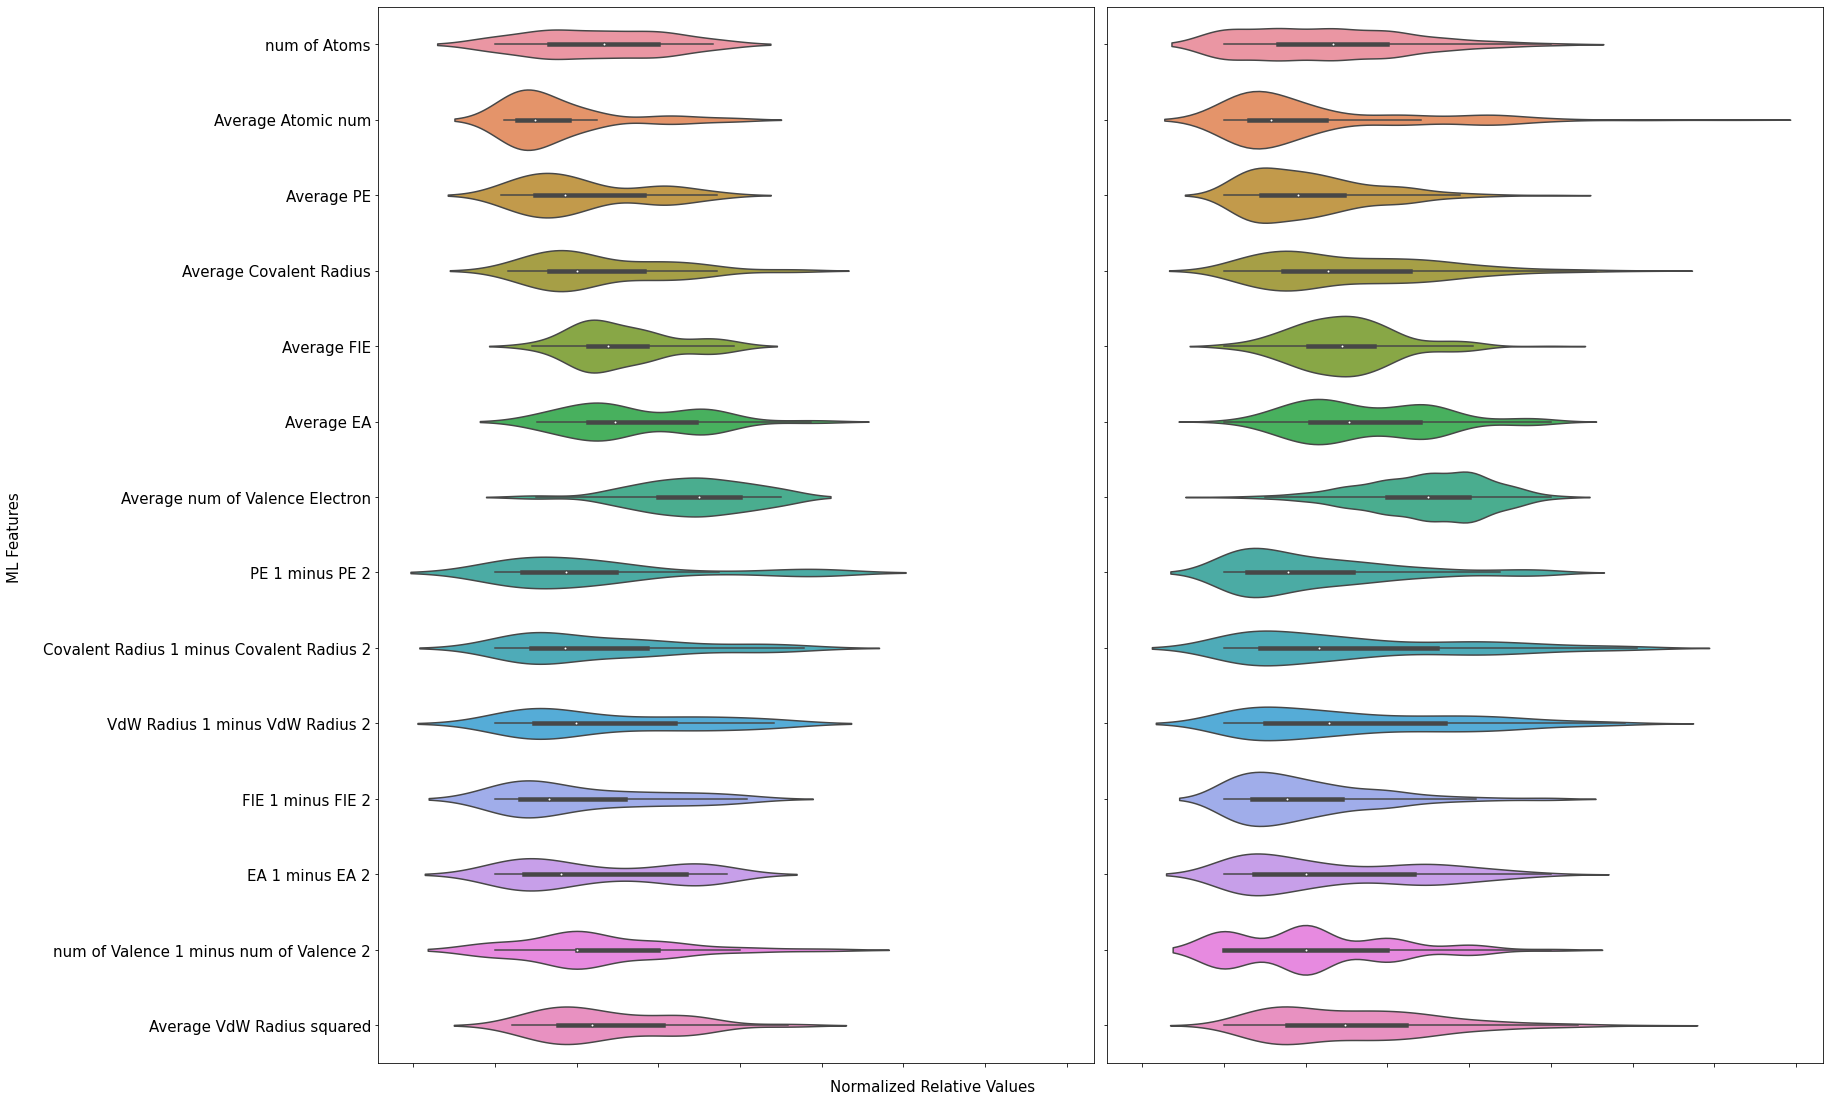

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

training_df = scaler(df_v5.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0]).set(xticklabels=[])
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1]).set(xticklabels=[])

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')

fig.text(0.5, -0.01, 'Normalized Relative Values', ha='center', va='center', fontsize = 15)
fig.text(-0.01, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout(pad = 1);

In [134]:
'''fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

x = list(prediction_df.columns)

training_df = scaler(df_v5.copy())
full_df = scaler(prediction_df.copy())

ax1.violinplot(training_df.iloc[:, :-1].T, vert=False)
ax2.violinplot(full_df.T, vert=False)

for ax in [ax1, ax2]:
    set_axis_style(ax, x)

fig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);'''

"fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))\n\nx = list(prediction_df.columns)\n\ntraining_df = scaler(df_v5.copy())\nfull_df = scaler(prediction_df.copy())\n\nax1.violinplot(training_df.iloc[:, :-1].T, vert=False)\nax2.violinplot(full_df.T, vert=False)\n\nfor ax in [ax1, ax2]:\n    set_axis_style(ax, x)\n\nfig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)\nfig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)\nfig.tight_layout(pad = 1);"

In [135]:
# Adding the Gco column back
prediction_df['Difference'] = targets

In [136]:
def ml_predict(dataframe, name, reg):
    dataframe['Gdiff_ML'] = np.nan
    for i, col in enumerate(dataframe['Gdiff_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Gdiff_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Gdiff_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [137]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,Average VdW Radius squared,Difference
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,2.31,-0.18552
1,1.5,6.25,3.13,0.56,13.61,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,2.07,-0.23137
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,2.36,NaN
3,1.5,6.00,3.03,0.58,13.84,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,2.10,NaN
4,2.0,5.50,2.96,0.54,13.76,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,2.86,NaN
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,2.98,NaN
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,3.48,NaN
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,3.67,NaN


In [138]:
ml_predict(prediction_df, 'Difference' ,xgbr_optimized)

In [139]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,Average VdW Radius squared,Difference,Gdiff_ML,Gdiff_Final
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,2.31,-0.18552,-0.208521,-0.185520
1,1.5,6.25,3.13,0.56,13.61,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,2.07,-0.23137,-0.231518,-0.231370
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,2.36,NaN,-0.173021,-0.173021
3,1.5,6.00,3.03,0.58,13.84,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,2.10,NaN,-0.150115,-0.150115
4,2.0,5.50,2.96,0.54,13.76,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.01,NaN,-0.104590,-0.104590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,11.48,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,2.86,NaN,-0.011604,-0.011604
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,2.98,NaN,0.004107,0.004107
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,3.48,NaN,-0.068118,-0.068118
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,3.67,NaN,-0.021646,-0.021646


In [140]:
b = np.sqrt(((prediction_df['Difference'] - prediction_df['Gdiff_ML'])**2).mean()).round(4)

In [141]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0079
Testing RMSE: 0.003


In [142]:
prediction_df['Gdiff_Final'].describe()

count    289.000000
mean      -0.106356
std        0.081824
min       -0.397030
25%       -0.161755
50%       -0.106770
75%       -0.039693
max        0.117560
Name: Gdiff_Final, dtype: float64

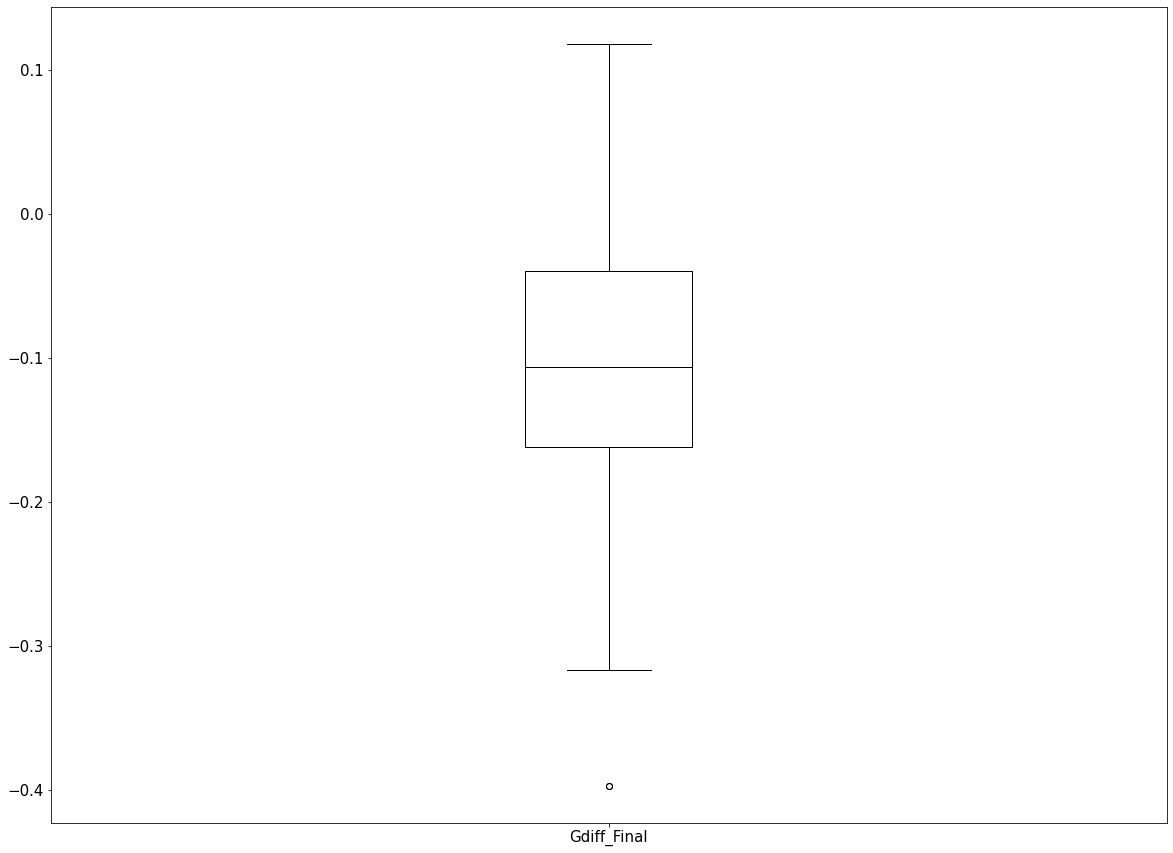

In [143]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Gdiff_Final', grid=False, figsize=(20, 15));

In [144]:
final = adsorbates.join(prediction_df, how = 'left')

In [145]:
final

,Adsorbate 1,Adsorbate 2,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average FIE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,Average VdW Radius squared,Difference,Gdiff_ML,Gdiff_Final
0,O,O,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,2.31,-0.18552,-0.208521,-0.185520
1,O,OH,1.5,6.25,3.13,0.56,13.61,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,2.07,-0.23137,-0.231518,-0.231370
2,O,N,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,2.36,NaN,-0.173021,-0.173021
3,O,NH,1.5,6.00,3.03,0.58,13.84,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,2.10,NaN,-0.150115,-0.150115
4,O,NH2,2.0,5.50,2.96,0.54,13.76,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.01,NaN,-0.104590,-0.104590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,2.0,29.50,2.49,0.95,11.48,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,2.86,NaN,-0.011604,-0.011604
285,I,F,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,2.98,NaN,0.004107,0.004107
286,I,Cl,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,3.48,NaN,-0.068118,-0.068118
287,I,Br,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,3.67,NaN,-0.021646,-0.021646


In [146]:
# Save the predicted dataframe
final.to_csv('predicted_Gdiff_xgbr.csv')

# 8. delta_Gco Heat Map

In [147]:
adsorbates = final['Adsorbate 1'].unique()
binding_energy = final['Gdiff_Final']

In [148]:
binding_energy

0     -0.185520
1     -0.231370
2     -0.173021
3     -0.150115
4     -0.104590
         ...   
284   -0.011604
285    0.004107
286   -0.068118
287   -0.021646
288   -0.142920
Name: Gdiff_Final, Length: 289, dtype: float64

In [153]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [154]:
# Transform series into a 2D array
twoD = transform_2D(binding_energy)

In [155]:
twoD

[[-0.18552000000000002,
  -0.23137,
  -0.17302094399929047,
  -0.15011480450630188,
  -0.10458981245756149,
  -0.08797883242368698,
  -0.04263013228774071,
  -0.1350317746400833,
  -0.0716426745057106,
  -0.20073996484279633,
  0.03097868151962757,
  -0.17338773608207703,
  -0.13784261047840118,
  -0.317172110080719,
  -0.15136,
  -0.056360770016908646,
  0.014146234840154648],
 [-0.23137,
  -0.28251,
  -0.10393179208040237,
  -0.2020580768585205,
  -0.22458185255527496,
  -0.22033000000000003,
  -0.050730000000000004,
  -0.16262000000000001,
  -0.22409404814243317,
  -0.2138560265302658,
  -0.040244754403829575,
  -0.27254220843315125,
  -0.39703,
  -0.13604000000000002,
  -0.09053035825490952,
  -0.10431858897209167,
  -0.024129608646035194],
 [-0.17302094399929047,
  -0.10393179208040237,
  -0.1348305642604828,
  -0.11947163939476013,
  -0.11795824766159058,
  -0.14364120364189148,
  -0.229,
  -0.16551151871681213,
  -0.1597985327243805,
  -0.09523,
  0.11756,
  -0.19320249557495117

In [156]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Gc-c",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

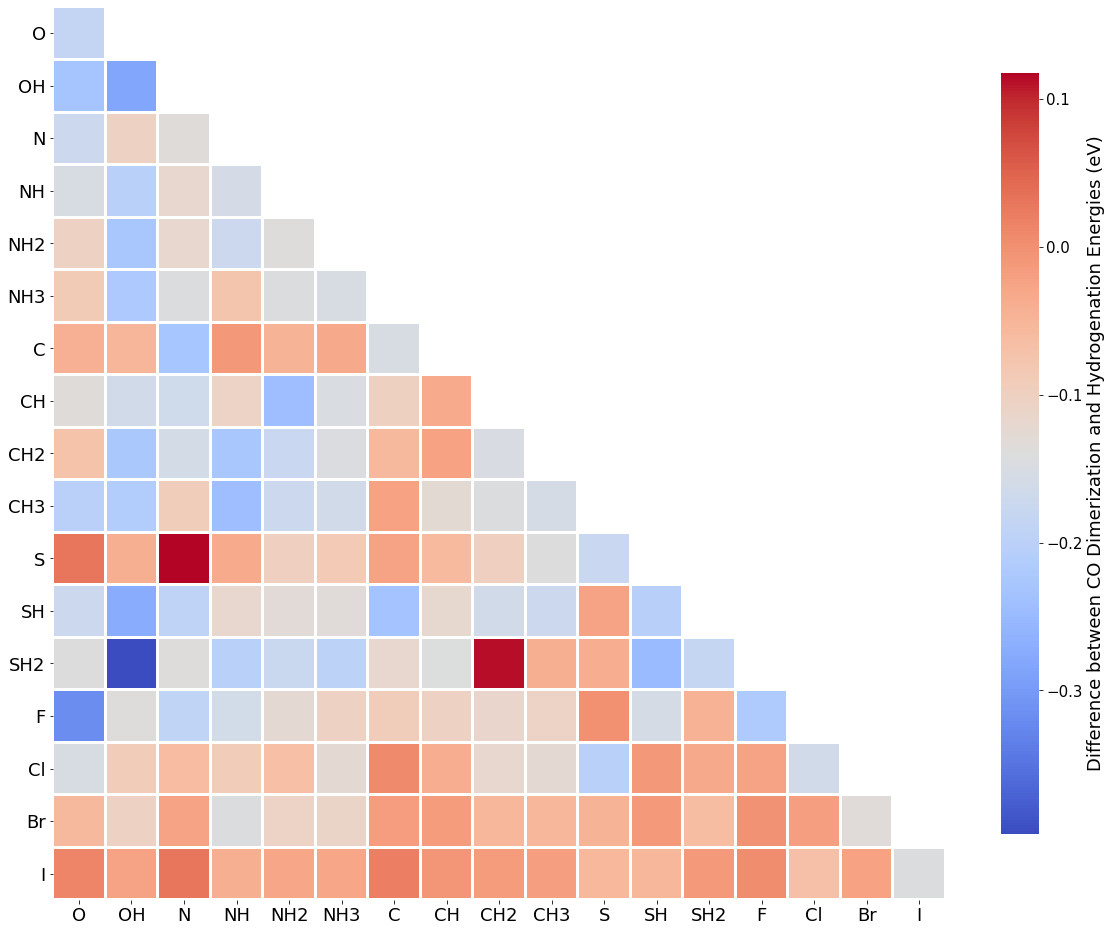

In [175]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar_kws={'label': 'Difference between CO Dimerization and Hydrogenation Energies (eV)', 'shrink': 0.7})
ax.figure.axes[-1].yaxis.label.set_size(18)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 0, size = 18)
ax.set_yticklabels(adsorbates, rotation = 0, size = 18)

plt.show()